In [1]:
import requests 
import pandas as pd 
import numpy as np 

In [2]:
import pandas as pd

gini = pd.read_csv('API_SI.POV.GINI_DS2_en_csv_v2_296215.csv')
gini.head()

Country Name Country Code Indicator Name Indicator Code  \
0                        Aruba          ABW     Gini index    SI.POV.GINI   
1  Africa Eastern and Southern          AFE     Gini index    SI.POV.GINI   
2                  Afghanistan          AFG     Gini index    SI.POV.GINI   
3   Africa Western and Central          AFW     Gini index    SI.POV.GINI   
4                       Angola          AGO     Gini index    SI.POV.GINI   

   1960  1961  1962  1963  1964  1965  ...  2016  2017  2018  2019  2020  \
0   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  51.3   NaN   NaN   

   2021  2022  2023  2024  Unnamed: 69  
0   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [3]:
# Drop the 'Unnamed: 69' column if it exists and is irrelevant
if 'Unnamed: 69' in gini.columns:
    gini = gini.drop(columns=['Unnamed: 69'])

# Identify the columns that represent years (they are numeric strings)
year_columns = [col for col in gini.columns if col.isdigit() ]

# Identify the identifier columns
id_vars = [col for col in gini.columns if col not in year_columns]

# Melt the DataFrame to transform year columns into rows
gini_tidy = gini.melt(id_vars=id_vars, value_vars=year_columns, var_name='year', value_name='gini_value')

# Convert 'year' column to integer type
gini_tidy['year'] = pd.to_numeric(gini_tidy['year'])

# Display the head of the tidied DataFrame
display(gini_tidy.head())

Country Name Country Code Indicator Name Indicator Code  \
0                        Aruba          ABW     Gini index    SI.POV.GINI   
1  Africa Eastern and Southern          AFE     Gini index    SI.POV.GINI   
2                  Afghanistan          AFG     Gini index    SI.POV.GINI   
3   Africa Western and Central          AFW     Gini index    SI.POV.GINI   
4                       Angola          AGO     Gini index    SI.POV.GINI   

   year  gini_value  
0  1960         NaN  
1  1960         NaN  
2  1960         NaN  
3  1960         NaN  
4  1960         NaN

The `gini_tidy` DataFrame now has a 'year' column, making it easier to analyze time-series data for Gini index values.

In [4]:
# Filter out rows with NaN gini_value
gini_no_nan = gini_tidy.dropna(subset=['gini_value'])

# Find the highest year for each country and use it to filter
gini_plot_data = gini_no_nan.loc[gini_no_nan.groupby('Country Name')['year'].idxmax()]

print(f"Data for the highest available year per country:")
print(gini_plot_data.shape)
gini_plot_data.head()

Data for the highest available year per country:
(171, 6)


Country Name Country Code Indicator Name Indicator Code  year  \
15965      Albania          ALB     Gini index    SI.POV.GINI  2020   
13626      Algeria          DZA     Gini index    SI.POV.GINI  2011   
15432       Angola          AGO     Gini index    SI.POV.GINI  2018   
17033    Argentina          ARG     Gini index    SI.POV.GINI  2024   
16768      Armenia          ARM     Gini index    SI.POV.GINI  2023   

       gini_value  
15965        29.4  
13626        27.6  
15432        51.3  
17033        42.4  
16768        27.2

In [5]:
gini_plot_data.gini_value.min(), gini_plot_data.gini_value.max()

(np.float64(23.8), np.float64(63.0))

In [6]:
import plotly.express as px

# Create the choropleth map for gini value of country
fig = px.choropleth(
    gini_plot_data,
    locations='Country Code',
    color='gini_value',
    hover_name='Country Name',
    color_continuous_scale = [(0.0, "#2166ac"), (0.5, "#f7f7f7"), (1.0, "#b2182b")], #'spectral_r', # Changed colorscale to blue-to-red
    range_color=[20, 60],
    title='LatestGlobal Gini Index (Blue to Red: 20 to 60)',
    # projection='natural earth'
)

fig.update_layout(
    title={
        'text': "Global Gini Index (Latest Available Year)",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    margin=dict(l=20, r=20, t=80, b=20),
    width=1500,       # Size control
    height=800,       # Size control
    paper_bgcolor='white',
)

# --------- Improve country borders ----------
fig.update_geos(
    showcountries=True,
    countrycolor="rgba(80,80,80,0.4)",
    showcoastlines=True,
    coastlinecolor="rgba(50,50,50,0.4)",
    projection_scale=0.95,
)

# --------- Improve colorbar ----------
fig.update_coloraxes(
    colorbar=dict(
        title="Gini Index",
        tickvals=[20, 30, 40, 50, 60],
        ticks="outside",
        len=0.75,
        thickness=20,
    )
)
fig.show()

In [7]:
import pandas as pd

country_codes = ['IN', 'CN', 'US', 'ZA', 'DE']

dfs = []
for code in country_codes:
    df = pd.read_csv(f"WID_data_{code}.csv", sep=";")
    dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)

#filtering for valriable = "sptincj999" to filter out the income share stats
income_df = df_combined[df_combined['variable'] == 'sptincj999'].copy()
income_df.reset_index(drop=True, inplace=True)
pattern = r'^p(\d+\.?\d*)p(\d+\.?\d*)$'

income_df[['p_start', 'p_end']] = (
    income_df['percentile']
    .str.extract(pattern)
    .astype(float)
)
# Filtering top 10%, top 1%, top 0.1%, and bottom 50%
top_10 = income_df[(income_df['p_start'] == 90) & (income_df['p_end'] == 100)].reset_index(drop=True)
top_1 = income_df[(income_df['p_start'] == 99) & (income_df['p_end'] == 100)].reset_index(drop=True)
top_0_1 = income_df[(income_df['p_start'] == 99.9) & (income_df['p_end'] == 100)].reset_index(drop=True)
bottom_50 = income_df[(income_df['p_start'] == 0) & (income_df['p_end'] == 50)].reset_index(drop=True)

df_income_summary = pd.concat([top_10, top_1, top_0_1, bottom_50], ignore_index=True)
df_income_summary['income_distribution'] = np.where(df_income_summary['p_start'] == 90, 'top_10%',
                                        np.where(df_income_summary['p_start'] == 99, 'top_1%',
                                        np.where(df_income_summary['p_start'] == 99.9, 'top_0.1%',
                                        np.where(df_income_summary['p_start'] == 0, 'bottom_50%', 'other'))))
print(df_income_summary.head(5))
print(income_df.head(5))

  country    variable percentile  year   value  age pop  p_start  p_end  \
0      IN  sptincj999    p90p100  1820  0.4800  999   j     90.0  100.0   
1      IN  sptincj999    p90p100  1850  0.5000  999   j     90.0  100.0   
2      IN  sptincj999    p90p100  1880  0.5460  999   j     90.0  100.0   
3      IN  sptincj999    p90p100  1900  0.5376  999   j     90.0  100.0   
4      IN  sptincj999    p90p100  1910  0.4480  999   j     90.0  100.0   

  income_distribution  
0             top_10%  
1             top_10%  
2             top_10%  
3             top_10%  
4             top_10%  
  country    variable percentile  year   value  age pop  p_start  p_end
0      IN  sptincj999     p4p100  1820  0.9911  999   j      4.0  100.0
1      IN  sptincj999     p4p100  1850  0.9922  999   j      4.0  100.0
2      IN  sptincj999     p4p100  1880  0.9982  999   j      4.0  100.0
3      IN  sptincj999     p4p100  1900  0.9982  999   j      4.0  100.0
4      IN  sptincj999     p4p100  1910  0.991

In [8]:
income_df[income_df['country']=='DE']

country    variable percentile  year   value  age pop  p_start  p_end
121579      DE  sptincj999       p0p1  1820  0.0006  999   j      0.0    1.0
121580      DE  sptincj999       p0p1  1850  0.0007  999   j      0.0    1.0
121581      DE  sptincj999       p0p1  1880  0.0005  999   j      0.0    1.0
121582      DE  sptincj999       p0p1  1900  0.0004  999   j      0.0    1.0
121583      DE  sptincj999       p0p1  1910  0.0003  999   j      0.0    1.0
...        ...         ...        ...   ...     ...  ...  ..      ...    ...
143257      DE  sptincj999       p0p0  1930  0.0000  999   j      0.0    0.0
143258      DE  sptincj999       p0p0  1940  0.0000  999   j      0.0    0.0
143259      DE  sptincj999       p0p0  1950  0.0000  999   j      0.0    0.0
143260      DE  sptincj999       p0p0  1960  0.0000  999   j      0.0    0.0
143261      DE  sptincj999       p0p0  1970  0.0000  999   j      0.0    0.0

[21683 rows x 9 columns]

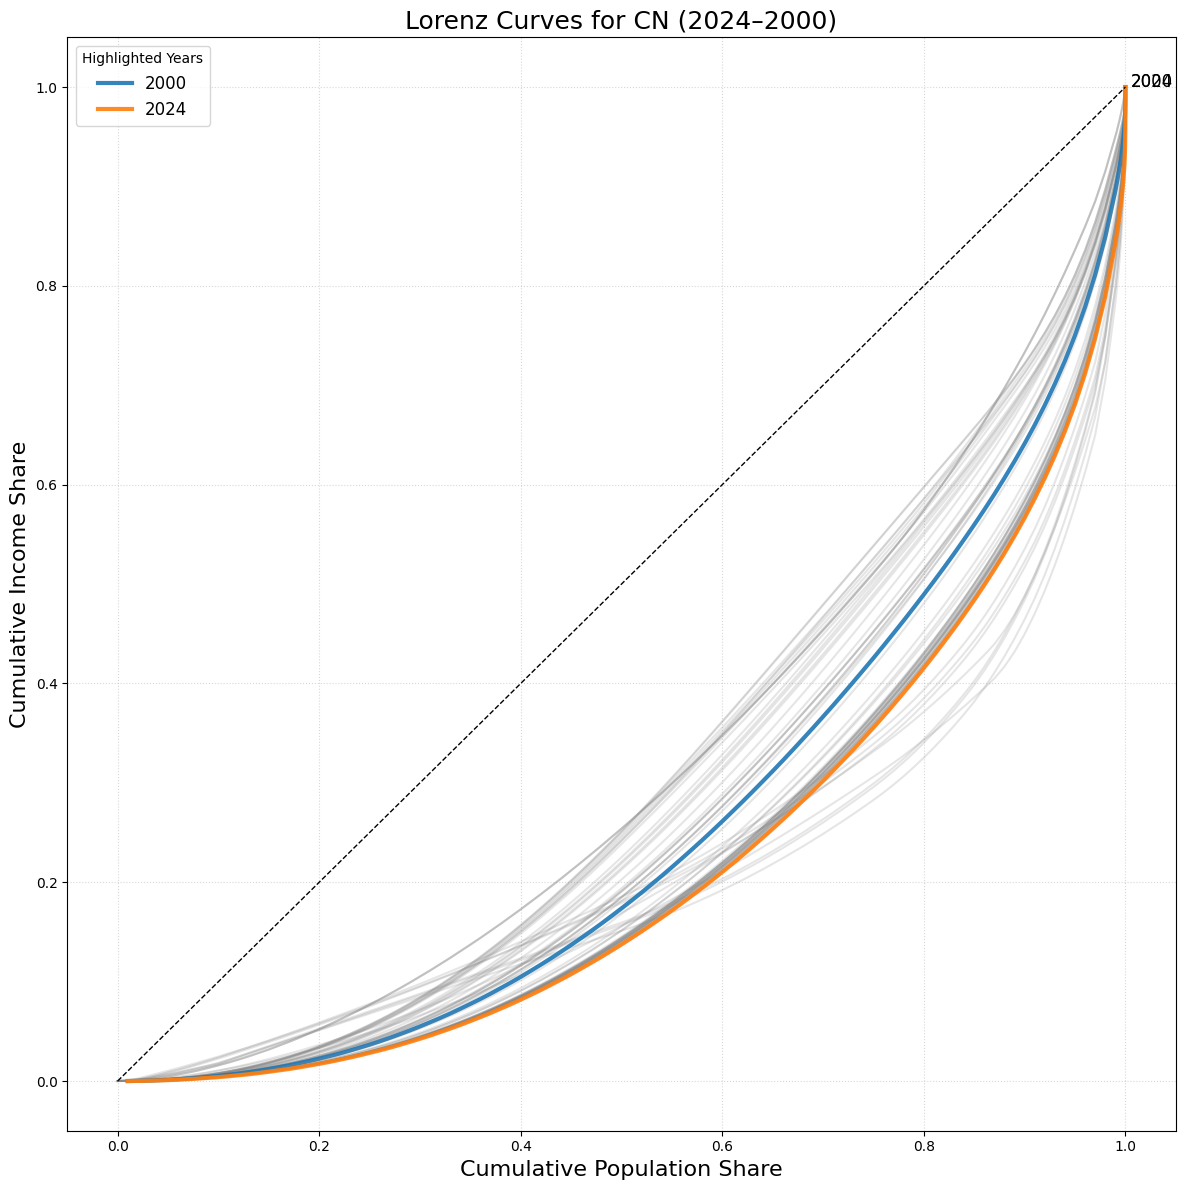

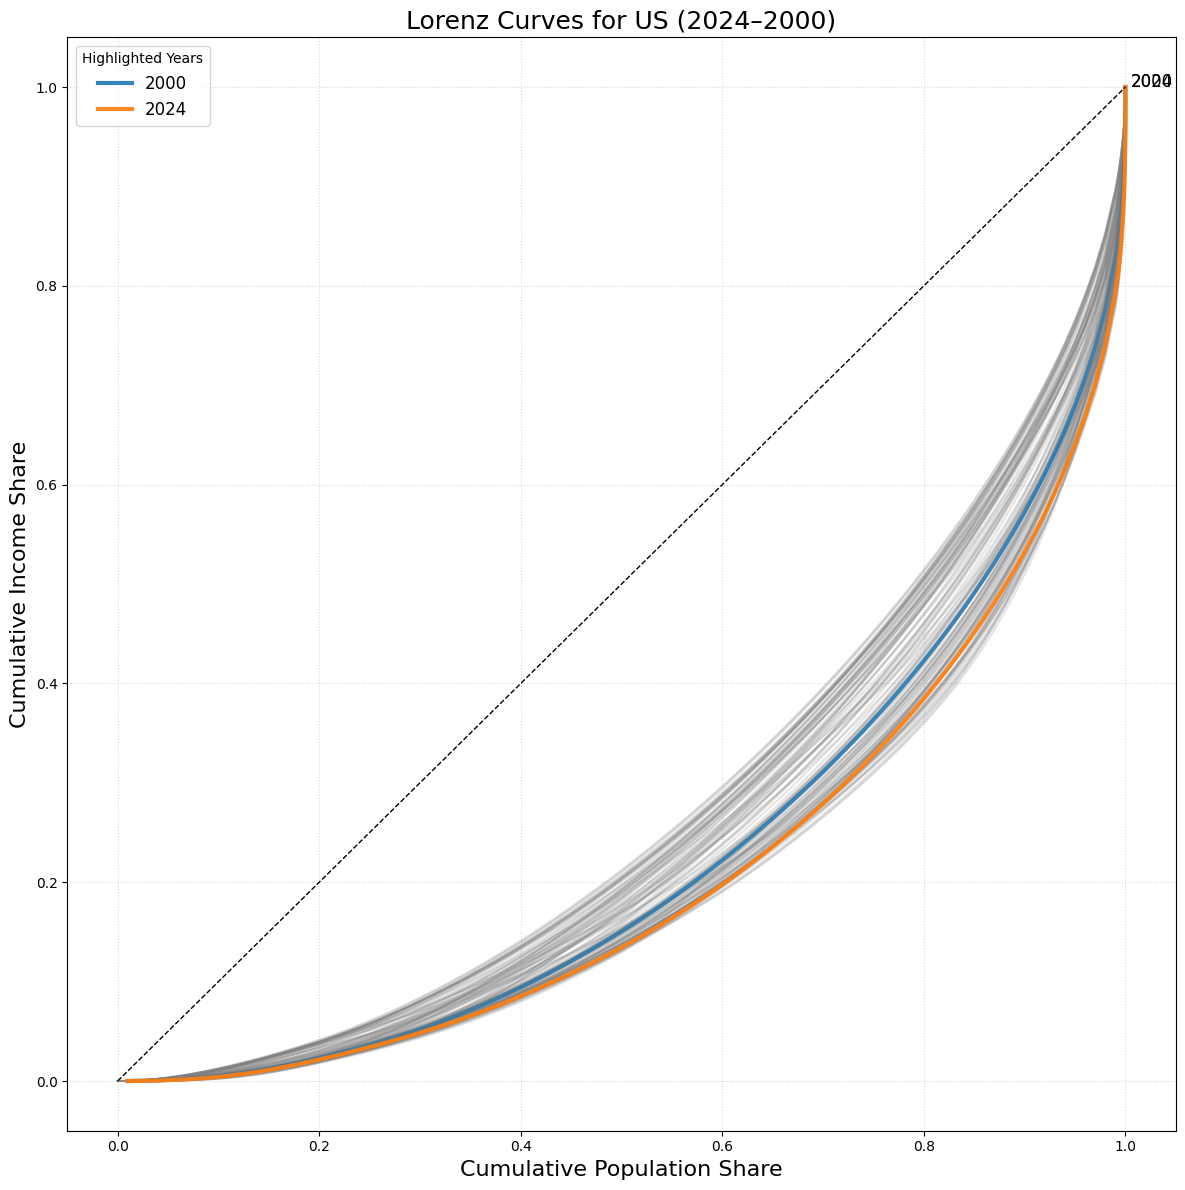

/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_48741/1521353399.py:52: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



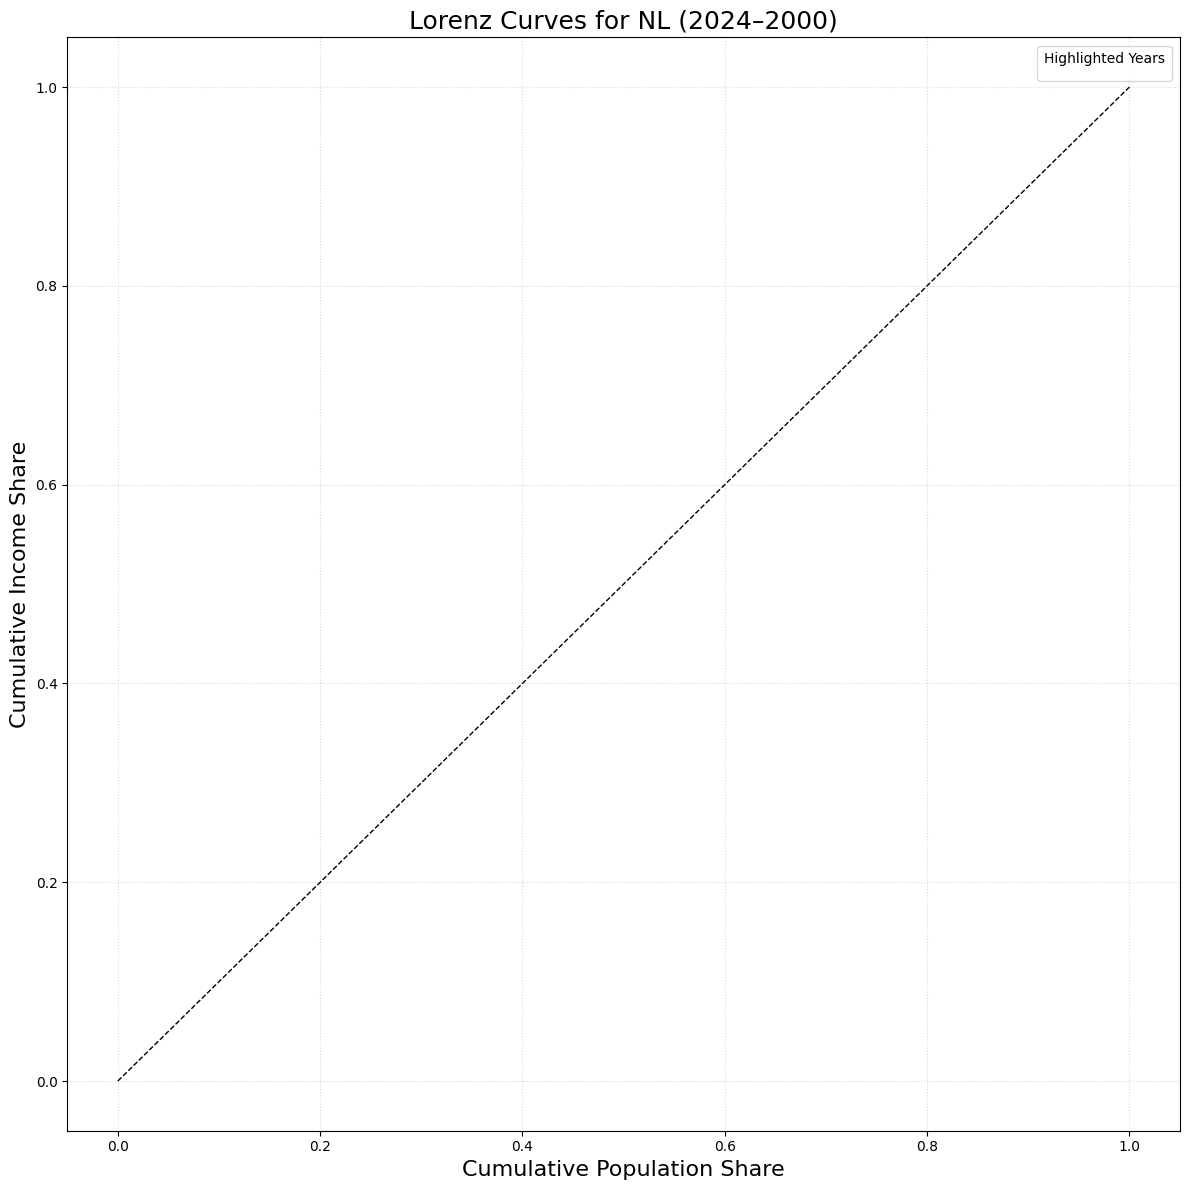

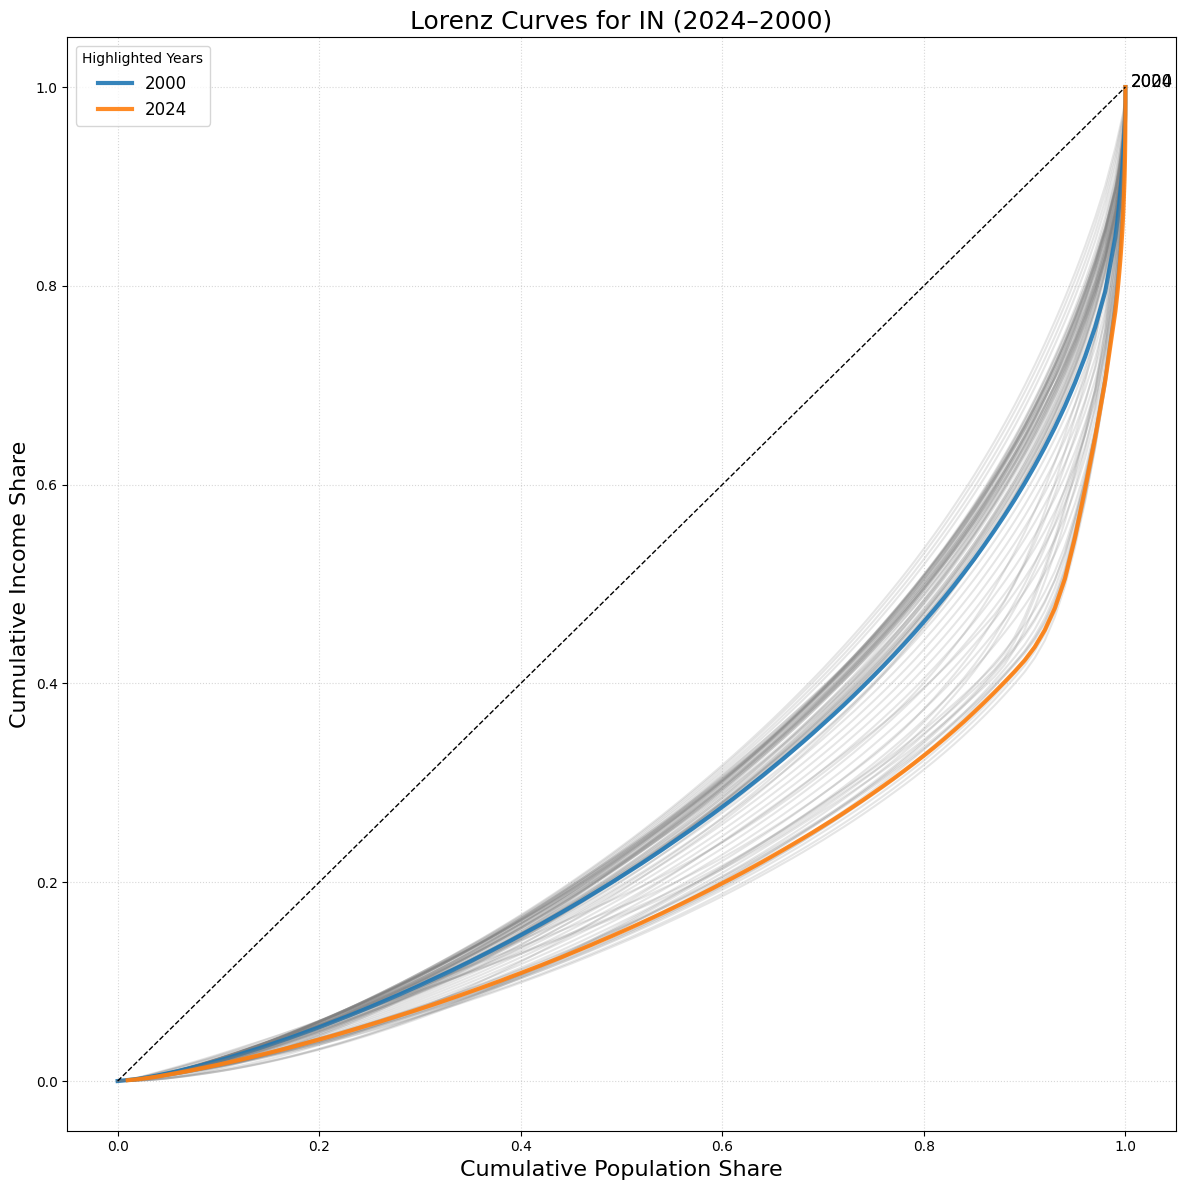

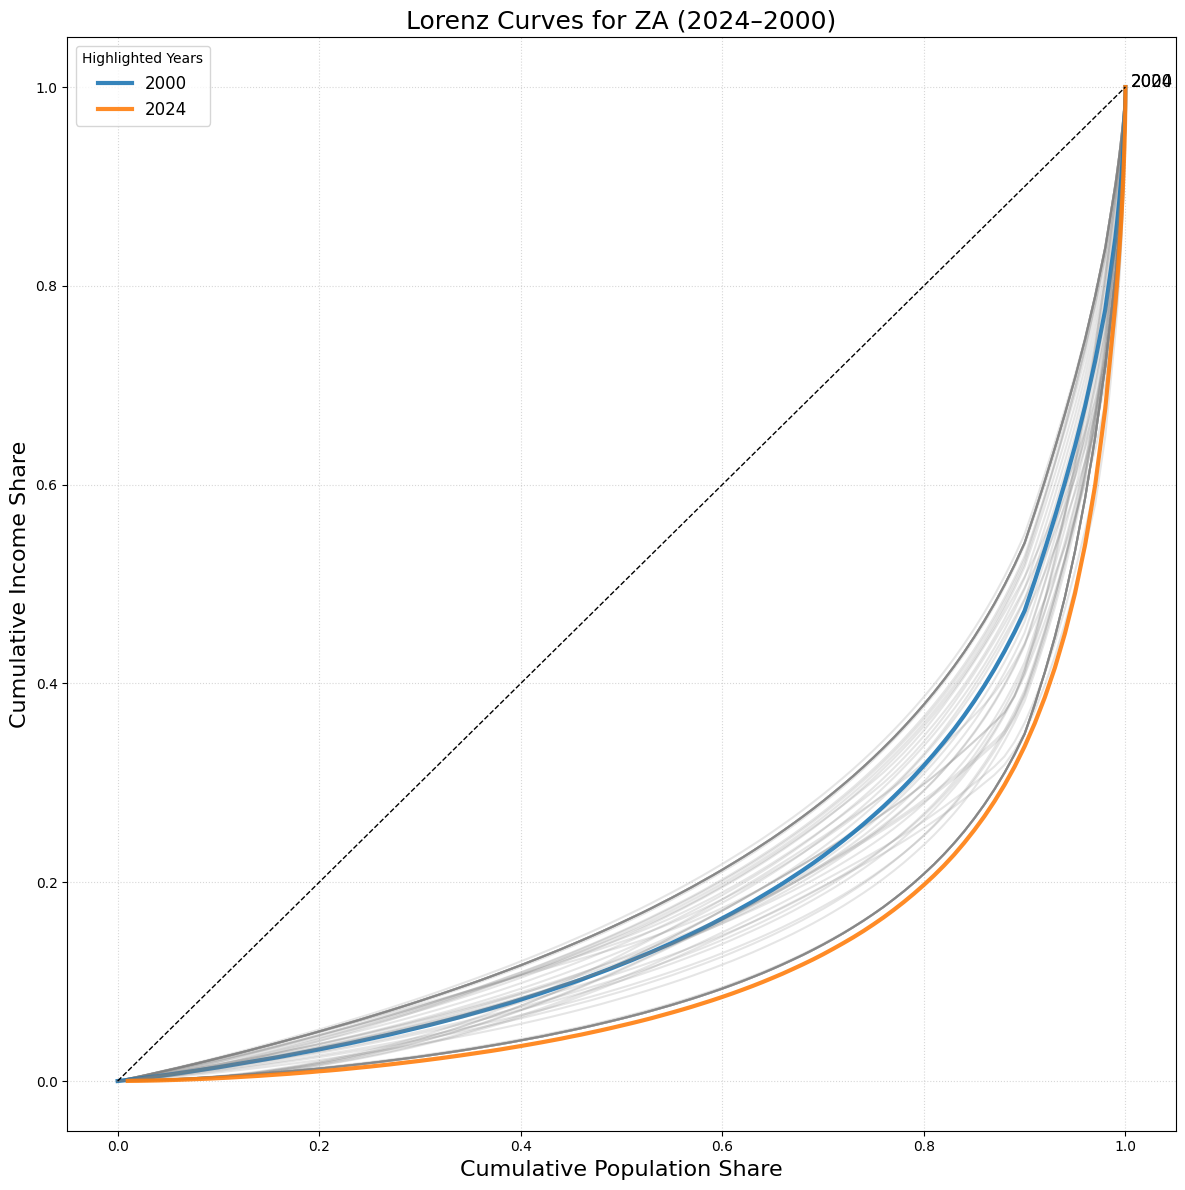

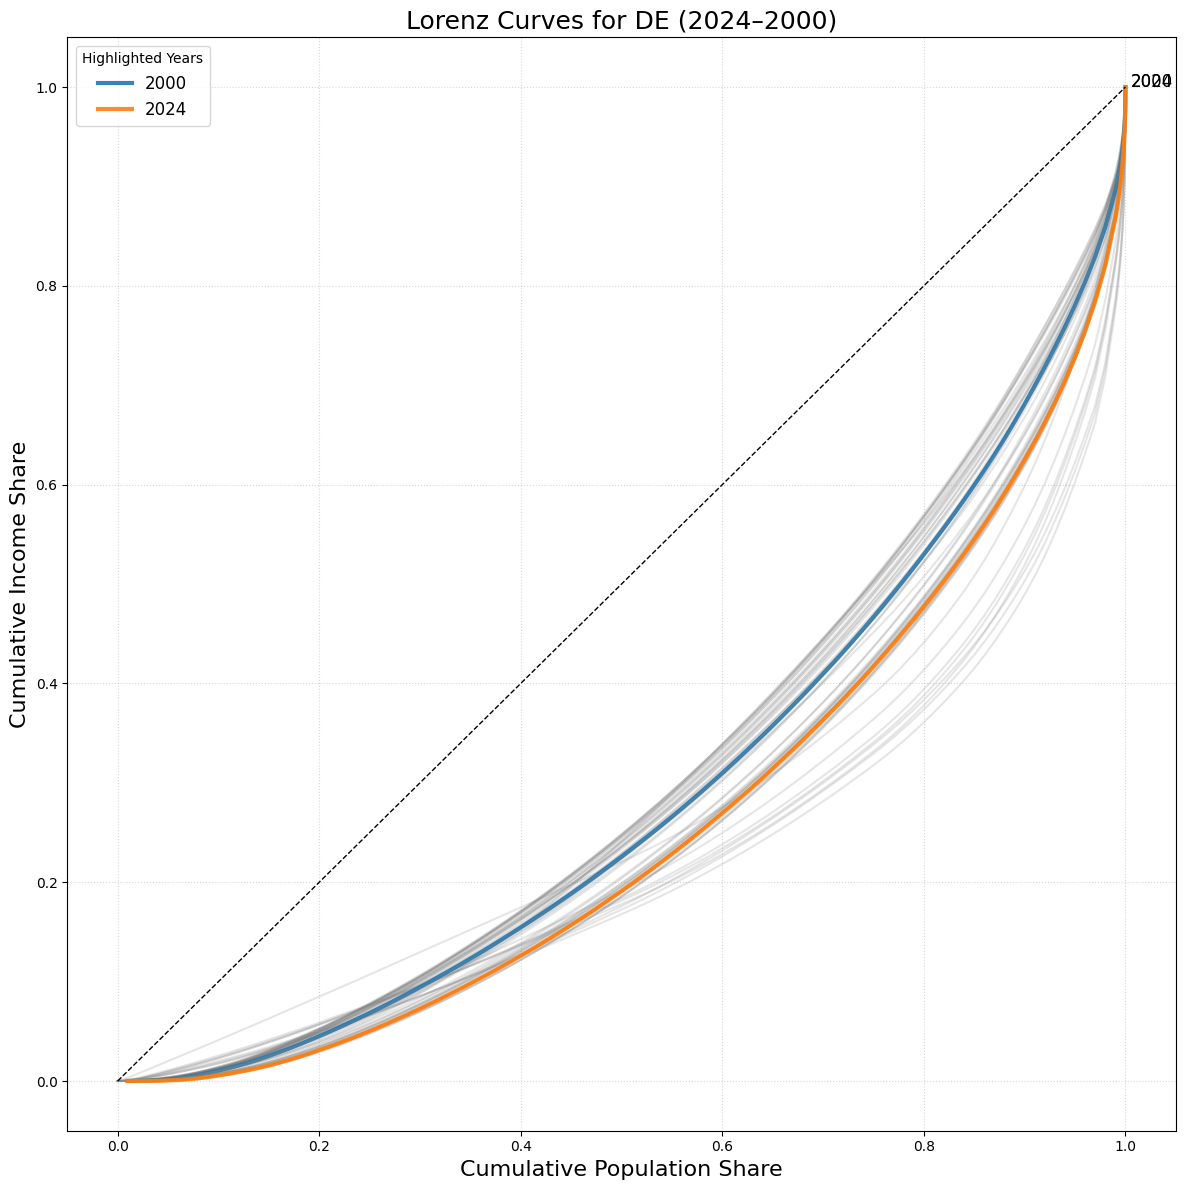

In [9]:
import matplotlib.pyplot as plt

# 2. Parse percentile "p0p10" -> p_start=0, p_end=10
def extract_bounds(s):
    s = s[1:]              # drop leading 'p'
    a, b = s.split('p')
    return float(a), float(b)

# 3. Keep only rows starting at 0% (these are cumulative bottom shares)
lorenz_points = income_df[income_df['p_start'] == 0].copy()

# 4. Convert to fractions 0–1
lorenz_points['cum_pop']    = lorenz_points['p_end'] / 100.0   # x-axis
lorenz_points['cum_income'] = lorenz_points['value']           # y-axis (already cumulative)

country_code = ['CN', 'US', 'NL', 'IN', 'ZA', 'DE']
for code in country_code:

    # Get available years for IN
    years = sorted(lorenz_points[lorenz_points['country']==code]['year'].unique())

    # Choose key years to annotate
    first_year = 2024
    last_year = 2000

    plt.figure(figsize=(12,12))

    for year in years:
        df_cnt = lorenz_points[(lorenz_points['country']==code) & (lorenz_points['year']==year)]
        df_cnt = df_cnt.sort_values('cum_pop')
        
        # Extremes shown boldly
        if year in [first_year, last_year]:
            plt.plot(df_cnt['cum_pop'], df_cnt['cum_income'], linewidth=3,
                    label=f'{year}', alpha=0.9)
            # Add year label at end of curve
            plt.text(df_cnt['cum_pop'].iloc[-1] + 0.005,
                    df_cnt['cum_income'].iloc[-1],
                    str(year), fontsize=12)
        else:
            # Muted lines for in-between years
            plt.plot(df_cnt['cum_pop'], df_cnt['cum_income'], 
                    color="gray", alpha=0.2)

    # Plot perfect equality line
    plt.plot([0,1], [0,1], linestyle="--", color="black", linewidth=1)

    plt.title(f"Lorenz Curves for {code} ({first_year}–{last_year})", fontsize=18)
    plt.xlabel("Cumulative Population Share", fontsize=16)
    plt.ylabel("Cumulative Income Share", fontsize=16)
    plt.grid(True, linestyle=":", alpha=0.5)
    plt.legend(title="Highlighted Years", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"lorenz_cured_{code}.png")
    plt.show()


## Interpreting the Lorenz Curves (Relative Inequality)

A Lorenz curve plots **cumulative income share** (y-axis) against **cumulative population share** (x-axis).

- The **45° dashed line** is perfect equality.
- The **further the Lorenz curve lies below** that diagonal, the **more unequal** the distribution.
- Highlighted years show how inequality changes over time while keeping totals normalized to 1.

### Relationship to the Net-Income Mass Curves
- Lorenz curves show **shares** (relative distribution).  
- Net-income mass curves show **levels** (absolute income mass).  
Use Lorenz curves to compare inequality independent of country size; use mass curves to see how large the economic “mountain” is and how it is distributed.


In [10]:
df_wide = df_income_summary.pivot_table(
    index=['country','year'], 
    columns='income_distribution', 
    values='value'
).reset_index(drop=False)
df_wide.head(5)

income_distribution country  year  bottom_50%  top_0.1%  top_1%  top_10%
0                        CN  1820      0.1855    0.0527  0.1616   0.4648
1                        CN  1850      0.1812    0.0572  0.1735   0.4772
2                        CN  1880      0.1594    0.0560  0.1761   0.5124
3                        CN  1900      0.1571    0.0573  0.1784   0.5161
4                        CN  1910      0.1691    0.0720  0.2026   0.5120

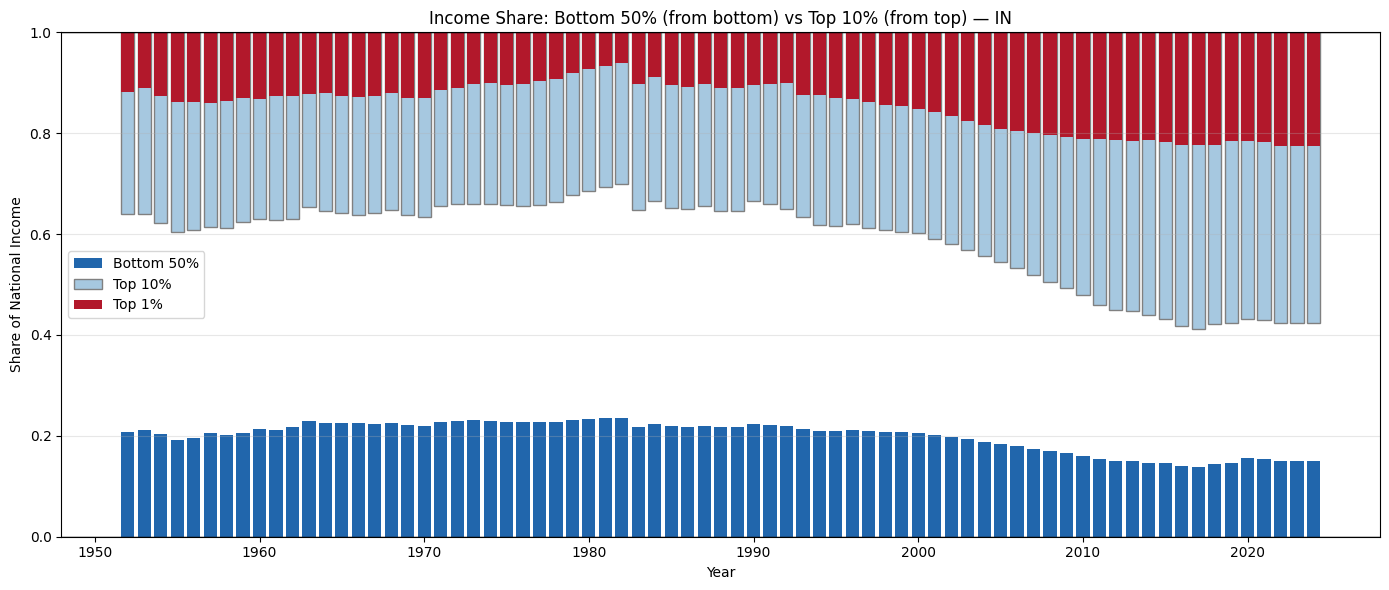

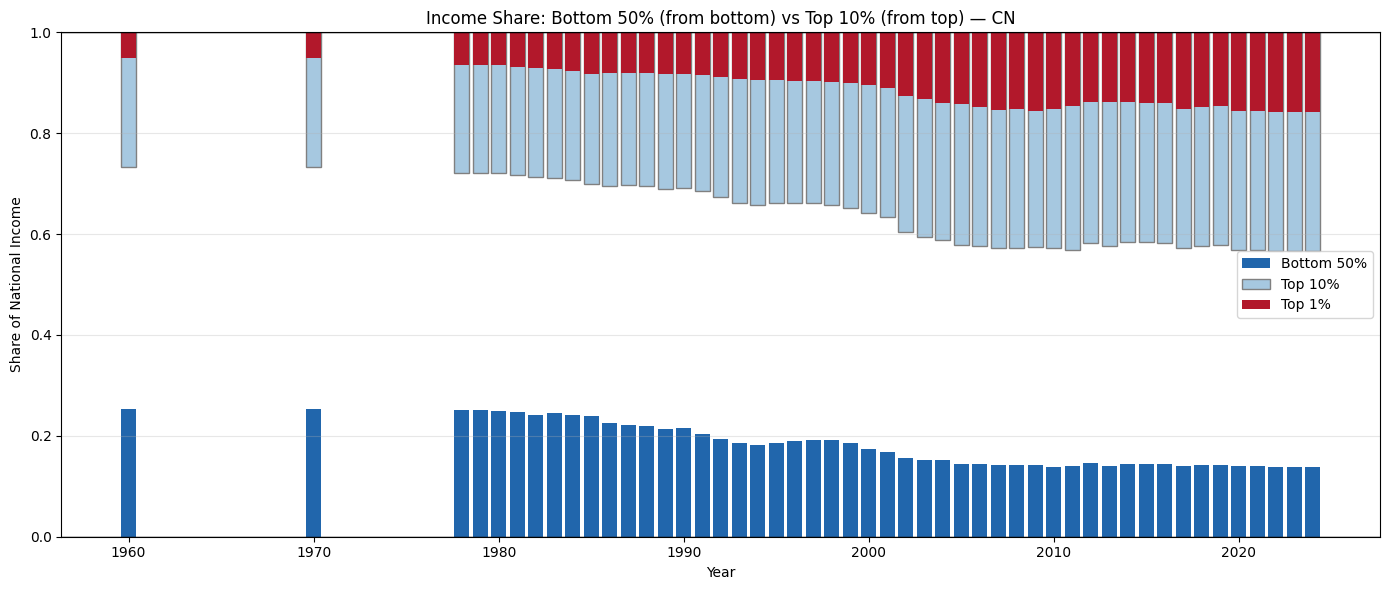

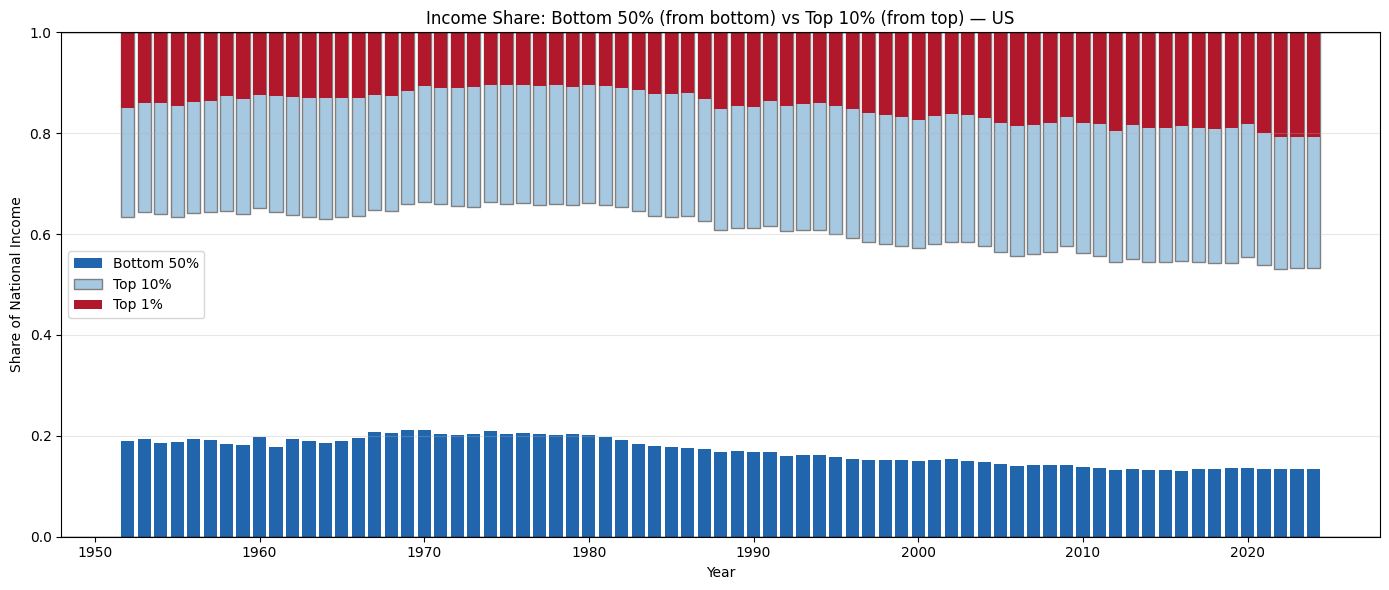

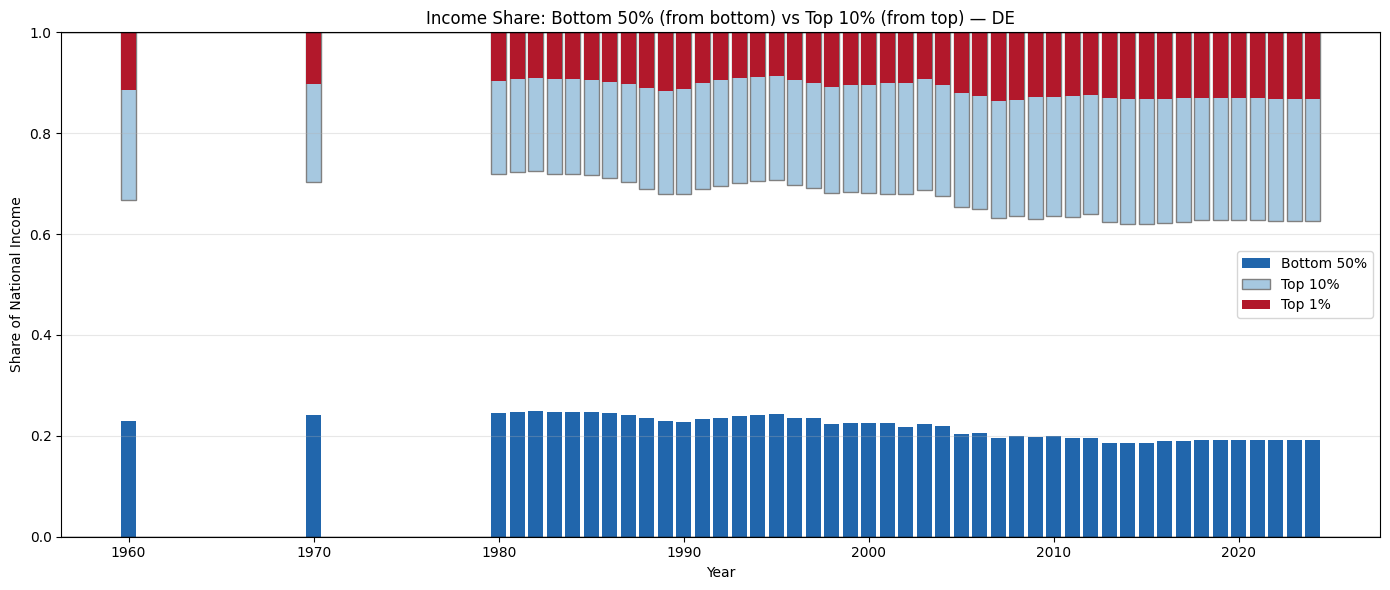

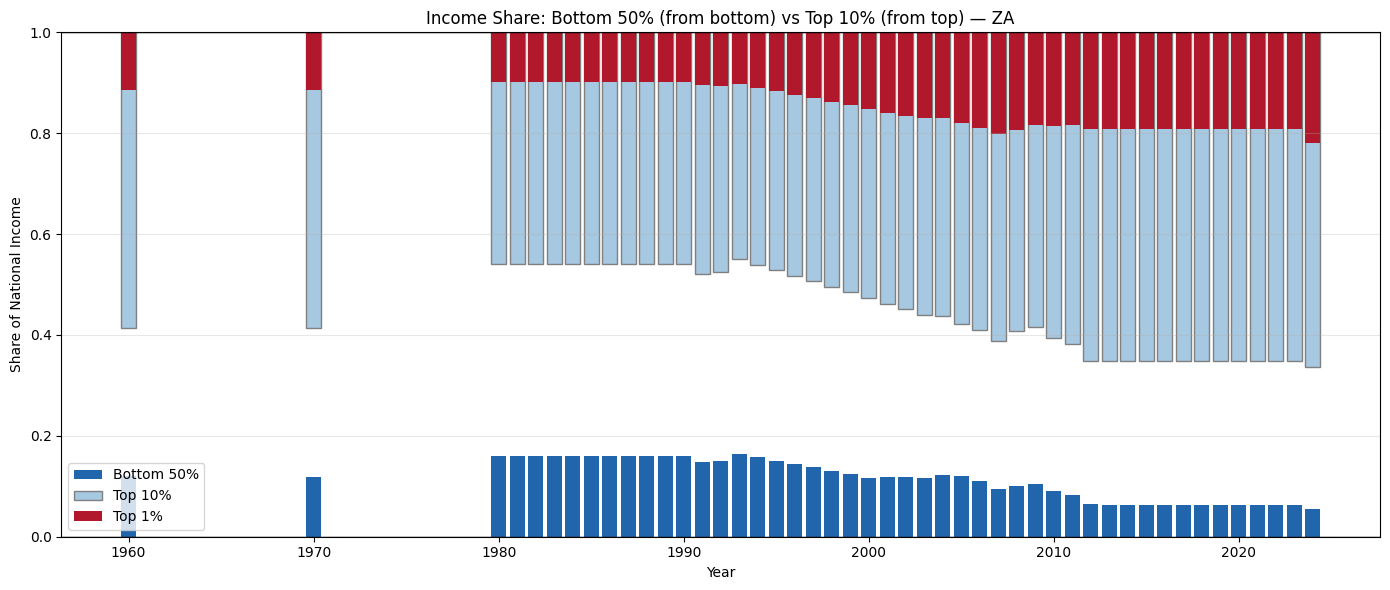

In [11]:
import matplotlib.pyplot as plt
bottom50_color = "#2166ac"   # blue
middle_color    = "#f7f7f7"  # light neutral
top_color       = "#b2182b"  # red
country_code = ['IN', 'CN', 'US', 'DE', 'ZA']
for code in country_code:
    # --- filter + pivot like you already did ---
    # df_country = df_wide[]
    df_plot = df_income_summary[(df_income_summary['country'] == code) & 
        (df_income_summary['year'] >= 1952)
    ]
    df_country = df_plot.pivot(
            index='year',
            columns='income_distribution',
            values='value'
        )
    #[['bottom_50%', 'top_10%', 'top_1%']]   # ensure order

    years    = df_country.index.values
    bottom50 = df_country['bottom_50%'].values
    top10    = df_country['top_10%'].values
    top1 = df_country['top_1%'].values

    fig, ax = plt.subplots(figsize=(14, 6))

    # # 1) Bottom 50%: bar from 0 up to bottom50
    # ax.bar(years, bottom50, width=0.8, color='tab:blue', label='Bottom 50%')
    # # 2) Top 10%: bar from 1 downward to (1 - top10)
    # ax.bar(years, top10, width=0.8, bottom=1 - top10, color='tab:orange', label='Top 10%')

    # ax.bar(years, top1, width=0.8, bottom=1 - top1, color='tab:red', label='Top 1%')
    ax.bar(years, bottom50, width=0.8, color="#2166ac", label="Bottom 50%")
    ax.bar(years, top10, width=0.8, bottom=1 - top10, color="#a6c8e0", edgecolor='grey', label="Top 10%")
    ax.bar(years, top1, width=0.8, bottom=1 - top1, color="#b2182b", label="Top 1%")

    # axis + cosmetics
    ax.set_ylim(0, 1)
    ax.axhline(0, color='black', linewidth=1)
    ax.axhline(1, color='black', linewidth=1)

    ax.set_title(f"Income Share: Bottom 50% (from bottom) vs Top 10% (from top) — {code}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Share of National Income")
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()

    plt.savefig(f'income_distribution_{code}.png')
    plt.show()


In [49]:
from pandas_datareader import data, wb

start_year = 1989
end_year = 2024
countries = ['USA','IND','CHN','ZAF', 'DEU']  # ISO3 codes accepted
# Indicators dictionary
indicators = {
    'NY.GDP.PCAP.KD': 'gdp_percap_const',
    'SL.UEM.TOTL.ZS': 'unemployment_pct',
    'FP.CPI.TOTL.ZG': 'inflation_pct',
    'NY.GNP.MKTP.CD': 'national_income',
    'NE.TRD.GNFS.ZS': 'trade_openness',
    'SL.TLF.ADVN.ZS': 'education_atainment',
    'PA.NUS.PPP': 'ppp_to_usd',
    'PA.NUS.FCRF': 'fx_to_usd',
    # 'SE.XPD.TOTL.GD.ZS': 'edu_spend_pct_gdp',
    # 'NE.TRD.GNFS.ZS': 'trade_pct_gdp',
    'SP.POP.TOTL': 'population'
}

from functools import reduce
frames = []
for code, name in indicators.items():
    print('Downloading', code)
    try:
        # Use wb.download, which is more robust for World Bank data and accepts 'country'
        df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)
        df = df.reset_index() # country and year become columns

        # Rename columns: the indicator code to its friendly name, and 'country' to 'country_name'
        df = df.rename(columns={'country': 'country_name', code: name})
        print(f"downaloding for {name} of shape: {df.shape} and sample: {df.head(5)}")
        frames.append(df[['country_name','year', name]])
    except Exception as e:
        print('Failed to fetch', code, ' — ', e)

if frames:
    indicators_df = reduce(lambda left, right: pd.merge(left, right, on=['country_name','year'], how='outer'), frames)
else:
    raise RuntimeError('No data frames fetched. Please download CSVs manually.')

indicators_df.sort_values(['country_name','year'], inplace=True)
indicators_df.columns

/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_48741/171953988.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for gdp_percap_const of shape: (180, 3) and sample:   country_name  year  gdp_percap_const
0        China  2024      13121.676991
1        China  2023      12484.157884
2        China  2022      11830.598370
3        China  2021      11469.570713
4        China  2020      10573.642006


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_48741/171953988.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for unemployment_pct of shape: (180, 3) and sample:   country_name  year  unemployment_pct
0        China  2024             4.571
1        China  2023             4.670
2        China  2022             4.980
3        China  2021             4.550
4        China  2020             5.000


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_48741/171953988.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for inflation_pct of shape: (180, 3) and sample:   country_name  year  inflation_pct
0        China  2024       0.218129
1        China  2023       0.234837
2        China  2022       1.973576
3        China  2021       0.981015
4        China  2020       2.419422


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_48741/171953988.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for national_income of shape: (180, 3) and sample:   country_name  year  national_income
0        China  2024     1.861304e+13
1        China  2023     1.812085e+13
2        China  2022     1.816355e+13
3        China  2021     1.807755e+13
4        China  2020     1.487881e+13


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_48741/171953988.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for trade_openness of shape: (180, 3) and sample:   country_name  year  trade_openness
0        China  2024       37.198420
1        China  2023       36.105192
2        China  2022       37.440720
3        China  2021       36.520691
4        China  2020       34.038951


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_48741/171953988.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for education_atainment of shape: (180, 3) and sample:   country_name  year  education_atainment
0        China  2024                  NaN
1        China  2023                  NaN
2        China  2022                  NaN
3        China  2021                  NaN
4        China  2020                  NaN


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_48741/171953988.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for ppp_to_usd of shape: (180, 3) and sample:   country_name  year  ppp_to_usd
0        China  2024    3.532549
1        China  2023    3.643738
2        China  2022    3.794041
3        China  2021    3.987409
4        China  2020    4.014657


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_48741/171953988.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for fx_to_usd of shape: (180, 3) and sample:   country_name  year  fx_to_usd
0        China  2024   7.197491
1        China  2023   7.083998
2        China  2022   6.737158
3        China  2021   6.448975
4        China  2020   6.900767
downaloding for population of shape: (180, 3) and sample:   country_name  year  population
0        China  2024  1408975000
1        China  2023  1410710000
2        China  2022  1412175000
3        China  2021  1412360000
4        China  2020  1411100000


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_48741/171953988.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



Index(['country_name', 'year', 'gdp_percap_const', 'unemployment_pct',
       'inflation_pct', 'national_income', 'trade_openness',
       'education_atainment', 'ppp_to_usd', 'fx_to_usd', 'population'],
      dtype='object')

In [50]:
indicators_df['year'] = pd.to_numeric(indicators_df['year'])
print(indicators_df.shape)
indicators_df.head()

(180, 11)


country_name  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0        China  1989        895.530526               NaN            NaN   
1        China  1990        917.270662               NaN            NaN   
2        China  1991        989.548541              2.37            NaN   
3        China  1992       1117.273295              2.37            NaN   
4        China  1993       1258.349461              2.69            NaN   

   national_income  trade_openness  education_atainment  ppp_to_usd  \
0     3.485567e+11       25.061555                  NaN         NaN   
1     3.625239e+11       24.225982                  NaN    1.681280   
2     3.852892e+11       25.872981                  NaN    1.735675   
3     4.287159e+11       30.034094                  NaN    1.836160   
4     4.456360e+11       35.908642                  NaN    2.066004   

   fx_to_usd  population  
0   3.765108  1118650000  
1   4.783208  1135185000  
2   5.323392  1150780000  
3   5.514592  1164970000  
4   5.761958  1178440000

In [51]:
indicators_df.isna().sum()

country_name            0
year                    0
gdp_percap_const        0
unemployment_pct       10
inflation_pct           5
national_income         0
trade_openness          0
education_atainment    80
ppp_to_usd              5
fx_to_usd               0
population              0
dtype: int64

In [52]:
indicators_df.country_name.unique()

array(['China', 'Germany', 'India', 'South Africa', 'United States'],
      dtype=object)

---
# Inequality Data

WID variable codes follow a structured format:

- **s** → Share (the variable measures a share of income/wealth).
- **ptinc** → Pretax income (income before taxes and transfers).
- **j** → Equal-split adults (income is split equally between partners in a household).
- **992 vs. 999** → Age group codes:
    - 992 = Adults only (age 20+)
    - 999 = All ages (entire population, including children)

In [53]:
country_name_to_code_map = {
    'Germany': 'DE',
    'India': 'IN',
    'United States': 'US',
    'China': 'CN',
    'South Africa': 'ZA'
}
indicators_df.rename(columns={'country_name': 'country'}, inplace=True)

indicators_df['country_code'] = indicators_df['country'].replace(country_name_to_code_map)
print(indicators_df.shape)
indicators_df.head()


(180, 12)


country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0   China  1989        895.530526               NaN            NaN   
1   China  1990        917.270662               NaN            NaN   
2   China  1991        989.548541              2.37            NaN   
3   China  1992       1117.273295              2.37            NaN   
4   China  1993       1258.349461              2.69            NaN   

   national_income  trade_openness  education_atainment  ppp_to_usd  \
0     3.485567e+11       25.061555                  NaN         NaN   
1     3.625239e+11       24.225982                  NaN    1.681280   
2     3.852892e+11       25.872981                  NaN    1.735675   
3     4.287159e+11       30.034094                  NaN    1.836160   
4     4.456360e+11       35.908642                  NaN    2.066004   

   fx_to_usd  population country_code  
0   3.765108  1118650000           CN  
1   4.783208  1135185000           CN  
2   5.323392  1150780000           CN  
3   5.514592  1164970000           CN  
4   5.761958  1178440000           CN

In [54]:
indicators_df.year.unique()

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

In [55]:
indicators_df.country.unique()

array(['China', 'Germany', 'India', 'South Africa', 'United States'],
      dtype=object)

In [71]:
# --- 3A. Build a CPI index from yoy inflation, per country ---
# Assume inflation_pct is e.g. 5 for 5% (not 0.05)
# Make sure we only keep the countries we care about
# indicators_panel = indicators_df[indicators_df['country_name'].isin(indicators_df['country_name'].unique())].copy()

# Sort for time-series ops
indicators_panel = indicators_df.sort_values(['country', 'year'])#.rename(columns={'country_name':'country'})
indicators_panel['inflation_factor'] = 1 + indicators_panel['inflation_pct'] / 100.0

cpi_list = []
for c, df_c in indicators_panel.groupby('country'):
    df_c = df_c.sort_values('year').copy()
    # set first year CPI = 1, then cumprod
    df_c['cpi_index'] = df_c['inflation_factor'].cumprod()
    cpi_list.append(df_c)

indicators_panel = pd.concat(cpi_list, ignore_index=True)

# --- 3B. Choose base year for constant prices ---
BASE_YEAR = 1994

base_cpi = indicators_panel.loc[indicators_panel['year'] == BASE_YEAR, ['country', 'cpi_index']].rename(
    columns={'cpi_index': 'cpi_base'}
)
indicators_panel = indicators_panel.merge(base_cpi, on='country', how='left')
indicators_panel


country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0            China  1989        895.530526               NaN            NaN   
1            China  1990        917.270662               NaN            NaN   
2            China  1991        989.548541             2.370            NaN   
3            China  1992       1117.273295             2.370            NaN   
4            China  1993       1258.349461             2.690            NaN   
..             ...   ...               ...               ...            ...   
175  United States  2020      59484.033553             8.055       1.233584   
176  United States  2021      62986.656313             5.349       4.697859   
177  United States  2022      64198.432488             3.650       8.002800   
178  United States  2023      65505.255701             3.638       4.116338   
179  United States  2024      66682.614704             4.106       2.949525   

     national_income  trade_openness  education_atainment  ppp_to_usd  \
0       3.485567e+11       25.061555                  NaN         NaN   
1       3.625239e+11       24.225982                  NaN    1.681280   
2       3.852892e+11       25.872981                  NaN    1.735675   
3       4.287159e+11       30.034094                  NaN    1.836160   
4       4.456360e+11       35.908642                  NaN    2.066004   
..               ...             ...                  ...         ...   
175     2.156570e+13       23.079778               71.640    1.000000   
176     2.383382e+13       25.213656               71.375    1.000000   
177     2.615616e+13       26.891690               71.780    1.000000   
178     2.782075e+13       24.899363               71.866    1.000000   
179     2.924311e+13       24.887992               71.592    1.000000   

     fx_to_usd  population country_code  inflation_factor  cpi_index  cpi_base  
0     3.765108  1118650000           CN               NaN        NaN   1.24257  
1     4.783208  1135185000           CN               NaN        NaN   1.24257  
2     5.323392  1150780000           CN               NaN        NaN   1.24257  
3     5.514592  1164970000           CN               NaN        NaN   1.24257  
4     5.761958  1178440000           CN               NaN        NaN   1.24257  
..         ...         ...          ...               ...        ...       ...  
175   1.000000   331577720           US          1.012336   2.188524   1.25340  
176   1.000000   332099760           US          1.046979   2.291337   1.25340  
177   1.000000   334017321           US          1.080028   2.474709   1.25340  
178   1.000000   336806231           US          1.041163   2.576576   1.25340  
179   1.000000   340110988           US          1.029495   2.652573   1.25340  

[180 rows x 15 columns]

In [72]:
# --- 3C. Compute national income per adult and real version ---
# If your `national_income` is already "per adult", skip dividing by population.
# Here I assume it's TOTAL national income in local currency.

indicators_panel['national_income_per_adult_nominal'] = (
    indicators_panel['national_income'] / indicators_panel['population']
)

# Constant-price (real) local currency, comparable across years
indicators_panel['net_income_real_local'] = (
    indicators_panel['national_income_per_adult_nominal'] *
    (indicators_panel['cpi_base'] / indicators_panel['cpi_index'])
)
indicators_panel['national_income_real_usd'] = (
    indicators_panel['national_income'] *
    (indicators_panel['cpi_base'] / indicators_panel['cpi_index'])
)
# ppp_to_usd: local currency per 1 PPP USD
# fx_to_usd:  local currency per 1 market USD

# Real PPP income per adult (constant prices, PPP-adjusted)
indicators_panel['net_income_ppp'] = (
    indicators_panel['net_income_real_local']*indicators_panel['fx_to_usd'] / indicators_panel['ppp_to_usd']
)

# Real income per adult in market USD (constant prices)
indicators_panel['net_income_usd_fx'] = (
    indicators_panel['net_income_real_local'] / indicators_panel['fx_to_usd']
)

indicators_panel.head(5)

country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0   China  1989        895.530526               NaN            NaN   
1   China  1990        917.270662               NaN            NaN   
2   China  1991        989.548541              2.37            NaN   
3   China  1992       1117.273295              2.37            NaN   
4   China  1993       1258.349461              2.69            NaN   

   national_income  trade_openness  education_atainment  ppp_to_usd  \
0     3.485567e+11       25.061555                  NaN         NaN   
1     3.625239e+11       24.225982                  NaN    1.681280   
2     3.852892e+11       25.872981                  NaN    1.735675   
3     4.287159e+11       30.034094                  NaN    1.836160   
4     4.456360e+11       35.908642                  NaN    2.066004   

   fx_to_usd  population country_code  inflation_factor  cpi_index  cpi_base  \
0   3.765108  1118650000           CN               NaN        NaN   1.24257   
1   4.783208  1135185000           CN               NaN        NaN   1.24257   
2   5.323392  1150780000           CN               NaN        NaN   1.24257   
3   5.514592  1164970000           CN               NaN        NaN   1.24257   
4   5.761958  1178440000           CN               NaN        NaN   1.24257   

   national_income_per_adult_nominal  net_income_real_local  \
0                         311.586895                    NaN   
1                         319.352265                    NaN   
2                         334.806999                    NaN   
3                         368.005919                    NaN   
4                         378.157559                    NaN   

   national_income_real_usd  net_income_ppp  net_income_usd_fx  
0                       NaN             NaN                NaN  
1                       NaN             NaN                NaN  
2                       NaN             NaN                NaN  
3                       NaN             NaN                NaN  
4                       NaN             NaN                NaN

In [73]:
indicators_panel[indicators_panel['country']=='India']

country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
72    India  1989        521.073384               NaN       7.074280   
73    India  1990        537.870270               NaN       8.971233   
74    India  1991        531.898398             7.722      13.870246   
75    India  1992        549.235070             7.733      11.787817   
76    India  1993        563.372872             7.750       6.326890   
77    India  1994        588.727892             7.645      10.247936   
78    India  1995        620.699954             7.608      10.224886   
79    India  1996        654.355928             7.558       8.977152   
80    India  1997        667.598423             7.610       7.164252   
81    India  1998        695.293709             7.639      13.230839   
82    India  1999        742.539208             7.617       4.669820   
83    India  2000        756.704110             7.624       4.009436   
84    India  2001        778.507378             7.653       3.779293   
85    India  2002        793.615913             7.753       4.297152   
86    India  2003        841.278895             7.680       3.805859   
87    India  2004        892.596615             7.625       3.767252   
88    India  2005        947.732566             7.552       4.246344   
89    India  2006       1008.232753             7.552       5.796523   
90    India  2007       1069.246968             7.561       6.372881   
91    India  2008       1086.506053             7.656       8.349267   
92    India  2009       1155.101633             7.664      10.882353   
93    India  2010       1235.159391             7.652      11.989390   
94    India  2011       1281.610544             7.616       8.911793   
95    India  2012       1333.096266             7.666       9.478997   
96    India  2013       1399.453798             7.711      10.017878   
97    India  2014       1484.316407             7.674       6.665657   
98    India  2015       1583.998159             7.631       4.906973   
99    India  2016       1694.465350             7.601       4.948216   
100   India  2017       1788.697703             7.618       3.328173   
101   India  2018       1883.357727             7.652       3.938826   
102   India  2019       1936.030677             6.510       3.729506   
103   India  2020       1806.501106             7.859       6.623437   
104   India  2021       1965.309434             6.380       5.131407   
105   India  2022       2098.211245             4.822       6.699034   
106   India  2023       2270.905181             4.172       5.649143   
107   India  2024       2396.712719             4.202       4.953036   

     national_income  trade_openness  education_atainment  ppp_to_usd  \
72      2.926026e+11       15.168132                  NaN         NaN   
73      3.167753e+11       15.506262                  NaN    5.495488   
74      2.659954e+11       16.987727                  NaN    6.046729   
75      2.837990e+11       18.433099                  NaN    6.442023   
76      2.754441e+11       19.651540                  NaN    6.913450   
77      3.231080e+11       20.078144               72.268    7.444462   
78      3.562523e+11       22.867449                  NaN    7.952394   
79      3.892119e+11       21.929488                  NaN    8.400987   
80      4.123139e+11       22.619387                  NaN    8.793420   
81      4.177928e+11       23.699470                  NaN    9.392232   
82      4.552601e+11       24.815598                  NaN    9.545346   
83      4.634195e+11       26.900923               69.206    9.674133   
84      4.812325e+11       25.993255                  NaN    9.765331   
85      5.114912e+11       29.508663                  NaN    9.973197   
86      6.031943e+11       30.592436                  NaN   10.158382   
87      7.041729e+11       37.503814                  NaN   10.458746   
88      8.144850e+11       42.001670               68.912   10.710892   
89      9.329153e+11     

In [74]:
indicators_panel['inflation_pct'] = df_merge.groupby('country')['inflation_pct'].transform(lambda x: x.ffill().bfill())
indicators_panel['unemployment_pct'] = df_merge.groupby('country')['unemployment_pct'].transform(lambda x: x.ffill().bfill())
# df_merge['edu_spend_pct_gdp'] = df_merge.groupby('country')['edu_spend_pct_gdp'].transform(lambda x: x.ffill().bfill())
missing_inflation_pct_count = df_merge['inflation_pct'].isnull().sum()
print(f"Number of missing 'inflation_pct' values before filling: {missing_inflation_pct_count}")
print("Missing 'inflation_pct' values after filling:", df_merge['inflation_pct'].isnull().sum())

Number of missing 'inflation_pct' values before filling: 0
Missing 'inflation_pct' values after filling: 0


In [75]:
# Now attempt the merge again
df_wide = df_wide.rename(columns={'country': 'country_code'})
df_merge = pd.merge(df_wide, indicators_panel, on=['country_code', 'year'])

# Print head of the merged dataframe to verify
print(df_merge.shape)
df_merge.head()

(180, 24)


country_code  year  bottom_50%  top_0.1%  top_1%  top_10% country  \
0           CN  1989      0.2126    0.0322  0.0833   0.3111   China   
1           CN  1990      0.2146    0.0319  0.0821   0.3085   China   
2           CN  1991      0.2027    0.0328  0.0842   0.3150   China   
3           CN  1992      0.1939    0.0343  0.0885   0.3271   China   
4           CN  1993      0.1849    0.0359  0.0929   0.3390   China   

   gdp_percap_const  unemployment_pct  inflation_pct  ...  fx_to_usd  \
0        895.530526              2.37      24.256990  ...   3.765108   
1        917.270662              2.37      24.256990  ...   4.783208   
2        989.548541              2.90      24.256990  ...   5.323392   
3       1117.273295              3.00      16.791225  ...   5.514592   
4       1258.349461              3.12       8.313160  ...   5.761958   

   population  inflation_factor  cpi_index  cpi_base  \
0  1118650000               NaN        NaN   1.24257   
1  1135185000               NaN        NaN   1.24257   
2  1150780000               NaN        NaN   1.24257   
3  1164970000               NaN        NaN   1.24257   
4  1178440000               NaN        NaN   1.24257   

   national_income_per_adult_nominal  net_income_real_local  \
0                         311.586895                    NaN   
1                         319.352265                    NaN   
2                         334.806999                    NaN   
3                         368.005919                    NaN   
4                         378.157559                    NaN   

   national_income_real_usd  net_income_ppp  net_income_usd_fx  
0                       NaN             NaN                NaN  
1                       NaN             NaN                NaN  
2                       NaN             NaN                NaN  
3                       NaN             NaN                NaN  
4                       NaN             NaN                NaN  

[5 rows x 24 columns]

In [76]:
lorenz_points.rename(columns={'country': 'country_code'}, inplace=True)
df_all = lorenz_points.merge(indicators_panel, how='left', on=['country_code', 'year'])
df_all['population_share'] = df_all['population']*df_all['cum_pop']
df_all['net_income_share'] = df_all['national_income_real_usd']*df_all['value']
df_all.head(10)

country_code    variable percentile  year   value  age pop  p_start  p_end  \
0           IN  sptincj999       p0p1  1820  0.0009  999   j      0.0    1.0   
1           IN  sptincj999       p0p1  1850  0.0007  999   j      0.0    1.0   
2           IN  sptincj999       p0p1  1880  0.0001  999   j      0.0    1.0   
3           IN  sptincj999       p0p1  1900  0.0001  999   j      0.0    1.0   
4           IN  sptincj999       p0p1  1910  0.0007  999   j      0.0    1.0   
5           IN  sptincj999       p0p1  1920  0.0001  999   j      0.0    1.0   
6           IN  sptincj999       p0p1  1930  0.0001  999   j      0.0    1.0   
7           IN  sptincj999       p0p1  1940  0.0008  999   j      0.0    1.0   
8           IN  sptincj999       p0p1  1950  0.0002  999   j      0.0    1.0   
9           IN  sptincj999       p0p1  1951  0.0002  999   j      0.0    1.0   

   cum_pop  ...  inflation_factor cpi_index  cpi_base  \
0     0.01  ...               NaN       NaN       NaN   
1     0.01  ...               NaN       NaN       NaN   
2     0.01  ...               NaN       NaN       NaN   
3     0.01  ...               NaN       NaN       NaN   
4     0.01  ...               NaN       NaN       NaN   
5     0.01  ...               NaN       NaN       NaN   
6     0.01  ...               NaN       NaN       NaN   
7     0.01  ...               NaN       NaN       NaN   
8     0.01  ...               NaN       NaN       NaN   
9     0.01  ...               NaN       NaN       NaN   

   national_income_per_adult_nominal  net_income_real_local  \
0                                NaN                    NaN   
1                                NaN                    NaN   
2                                NaN                    NaN   
3                                NaN                    NaN   
4                                NaN                    NaN   
5                                NaN                    NaN   
6                                NaN                    NaN   
7                                NaN                    NaN   
8                                NaN                    NaN   
9                                NaN                    NaN   

   national_income_real_usd  net_income_ppp  net_income_usd_fx  \
0                       NaN             NaN                NaN   
1                       NaN             NaN                NaN   
2                       NaN             NaN                NaN   
3                       NaN             NaN                NaN   
4                       NaN             NaN                NaN   
5                       NaN             NaN                NaN   
6                       NaN             NaN                NaN   
7                       NaN             NaN                NaN   
8                       NaN             NaN                NaN   
9                       NaN             NaN                NaN   

   population_share  net_income_share  
0               NaN               NaN  
1               NaN               NaN  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  
5               NaN               NaN  
6               NaN               NaN  
7               NaN               NaN  
8               NaN               NaN  
9               NaN               NaN  

[10 rows x 31 columns]

In [77]:
df_all.shape

(47062, 31)

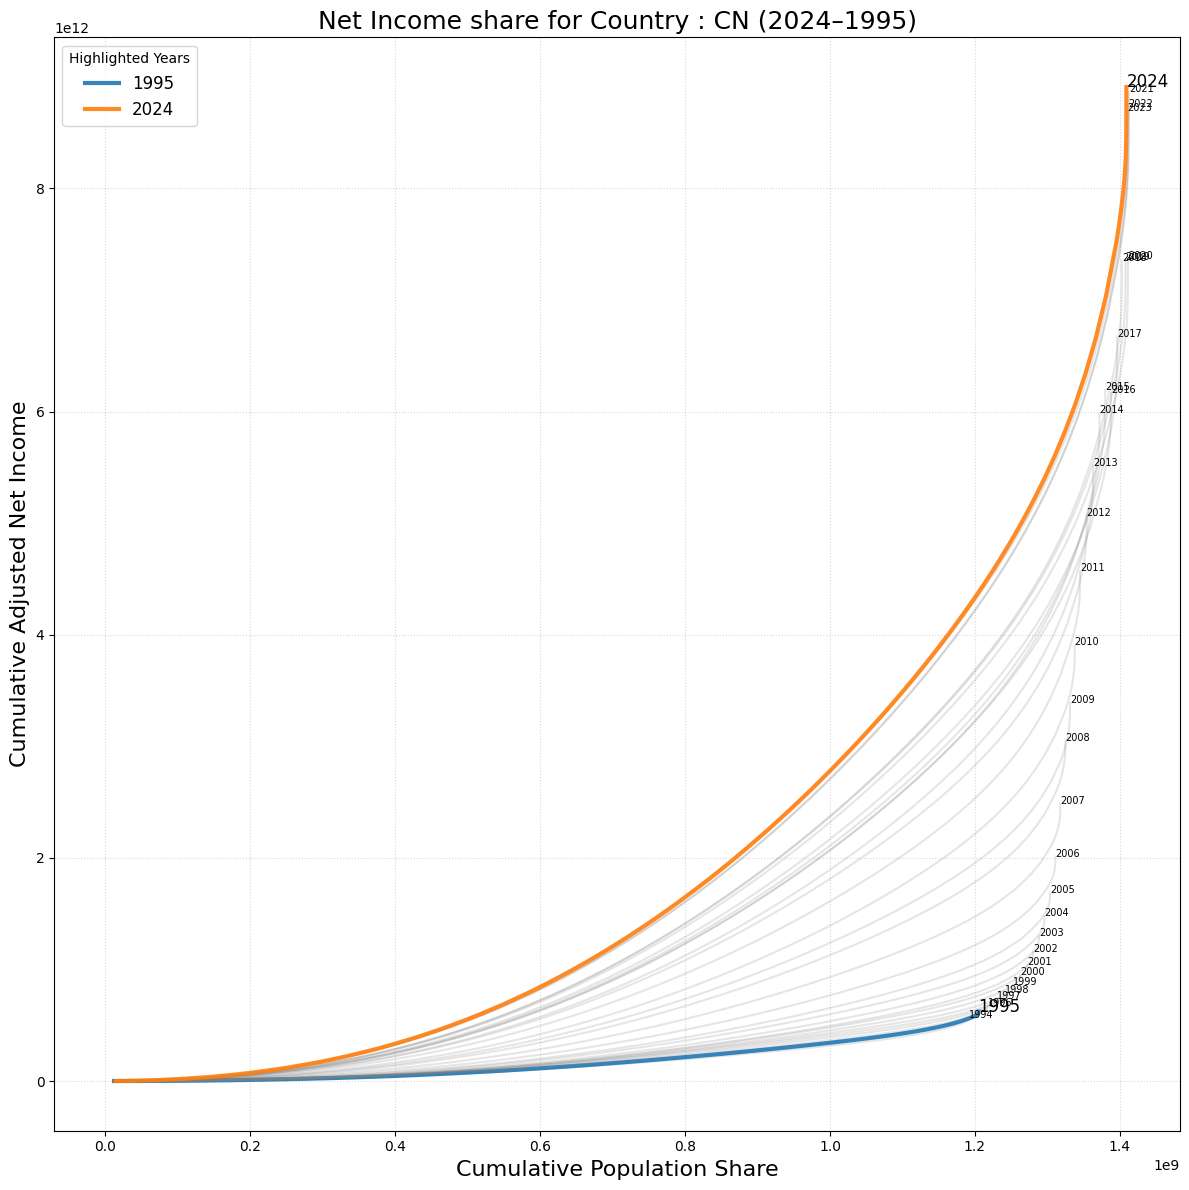

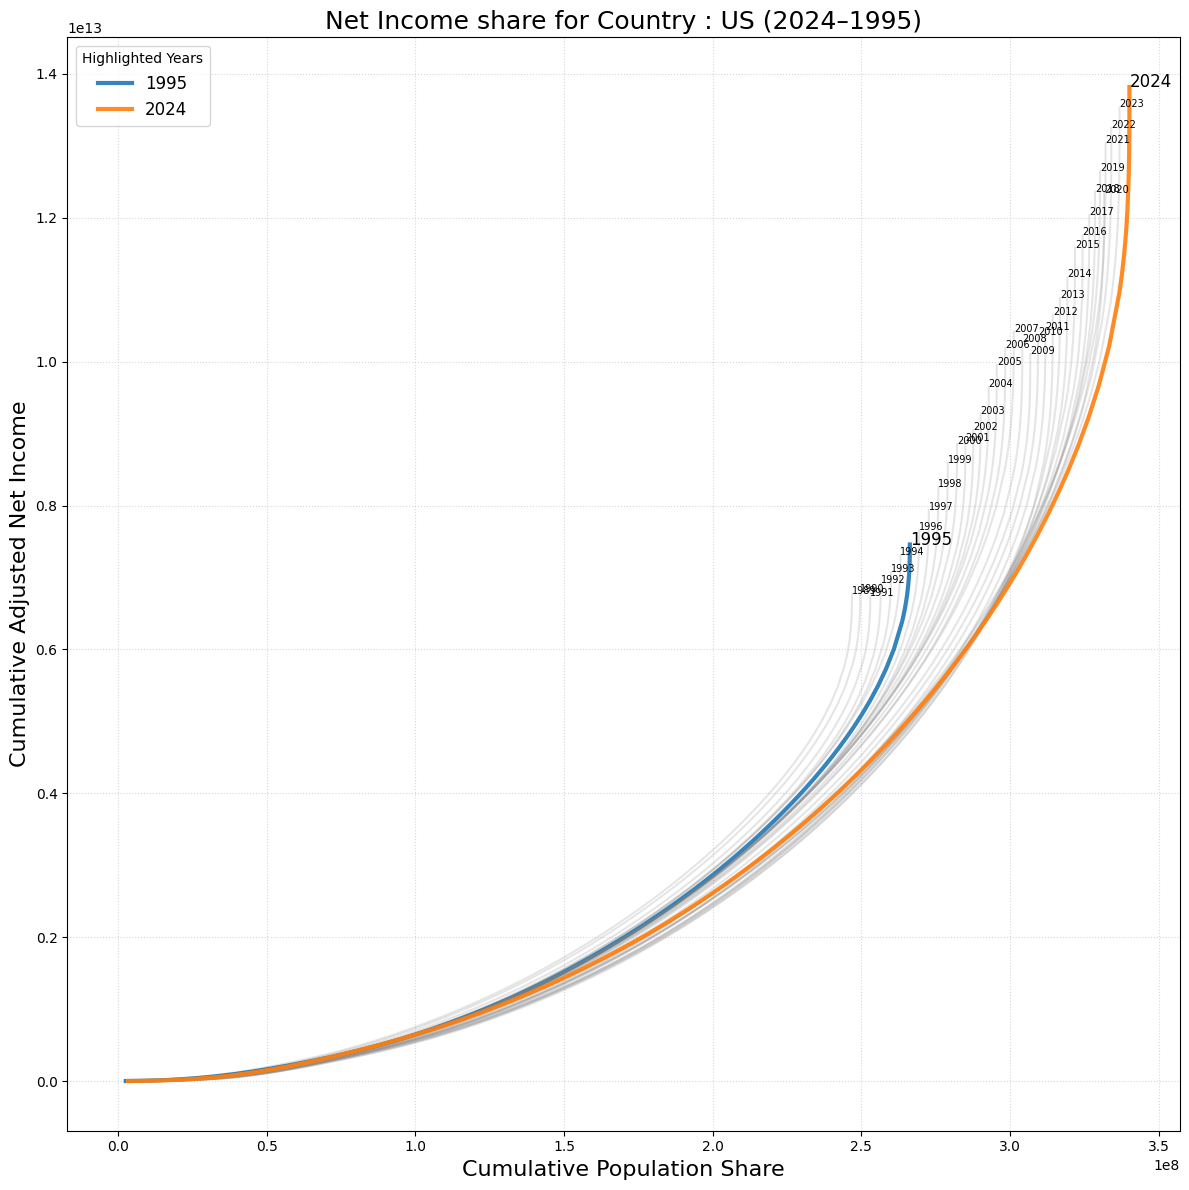

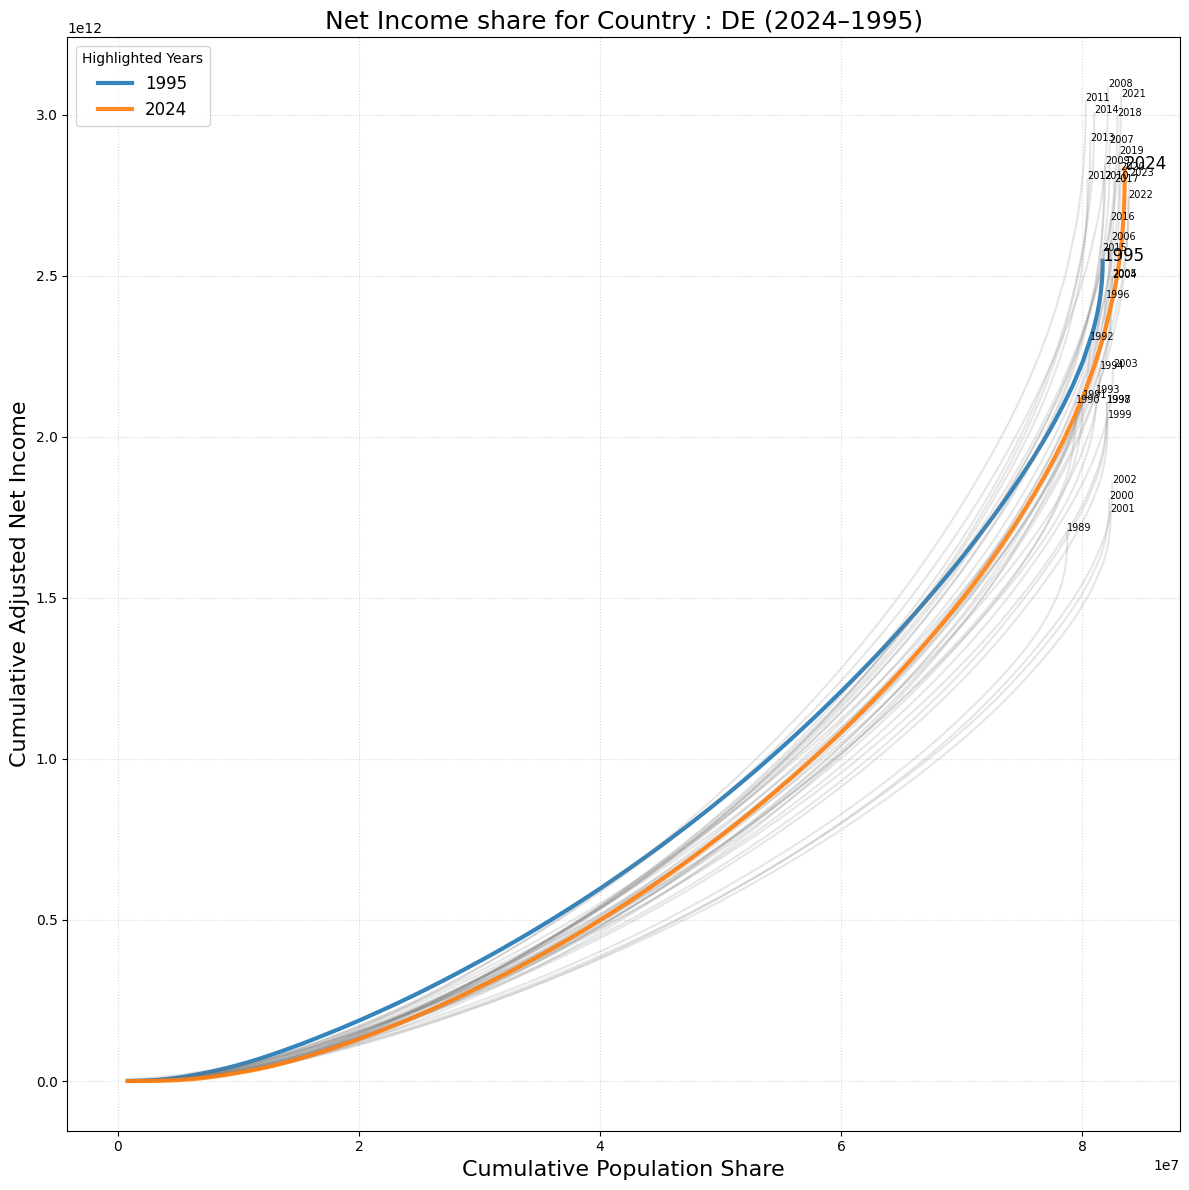

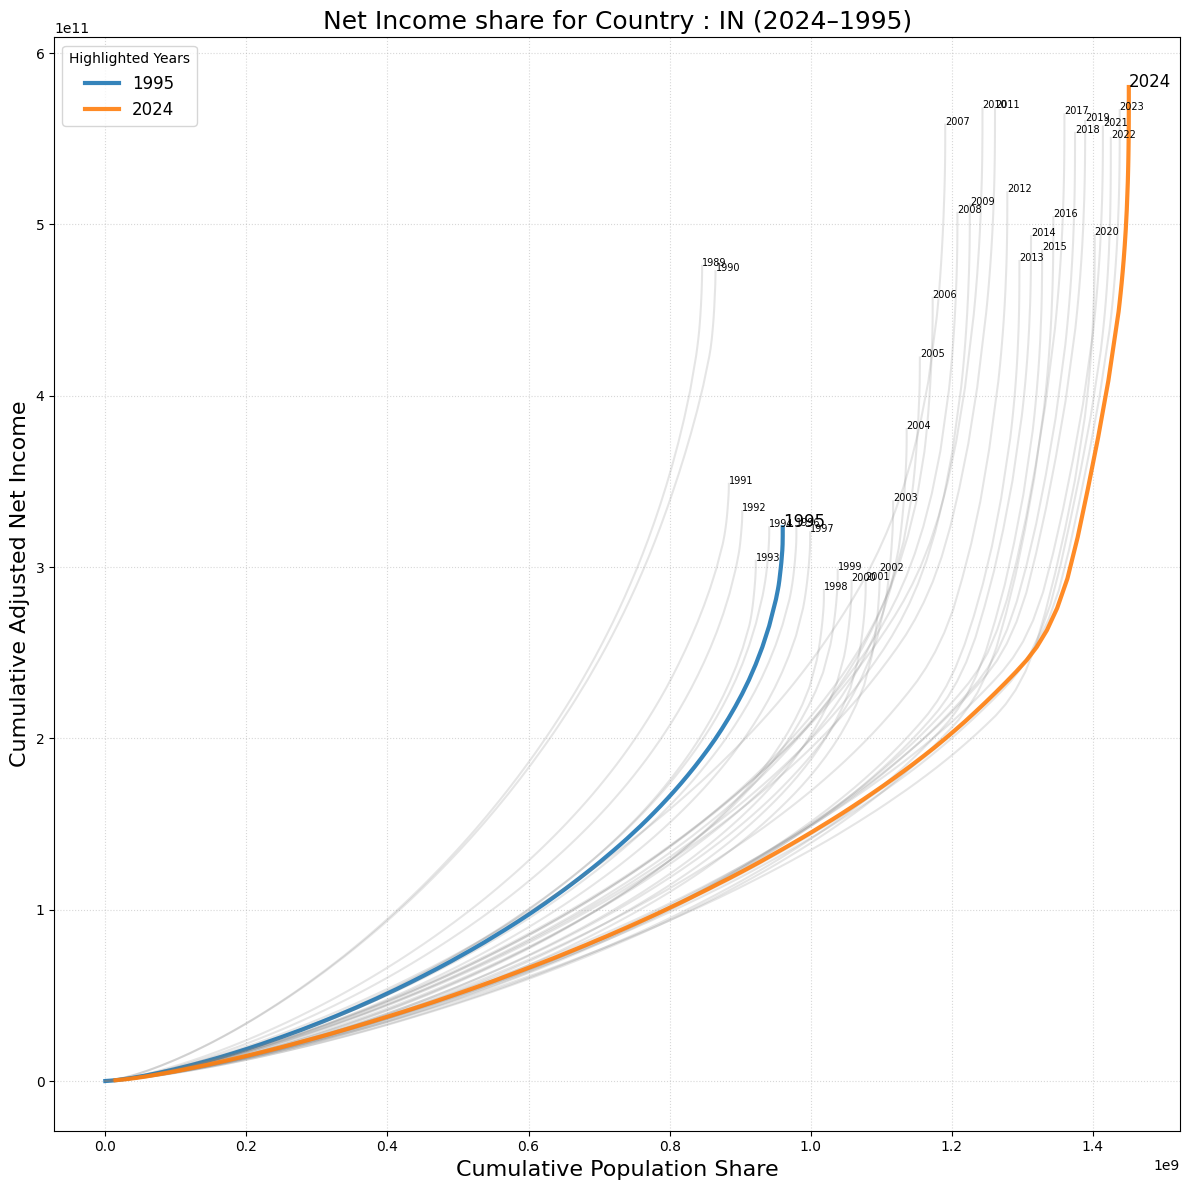

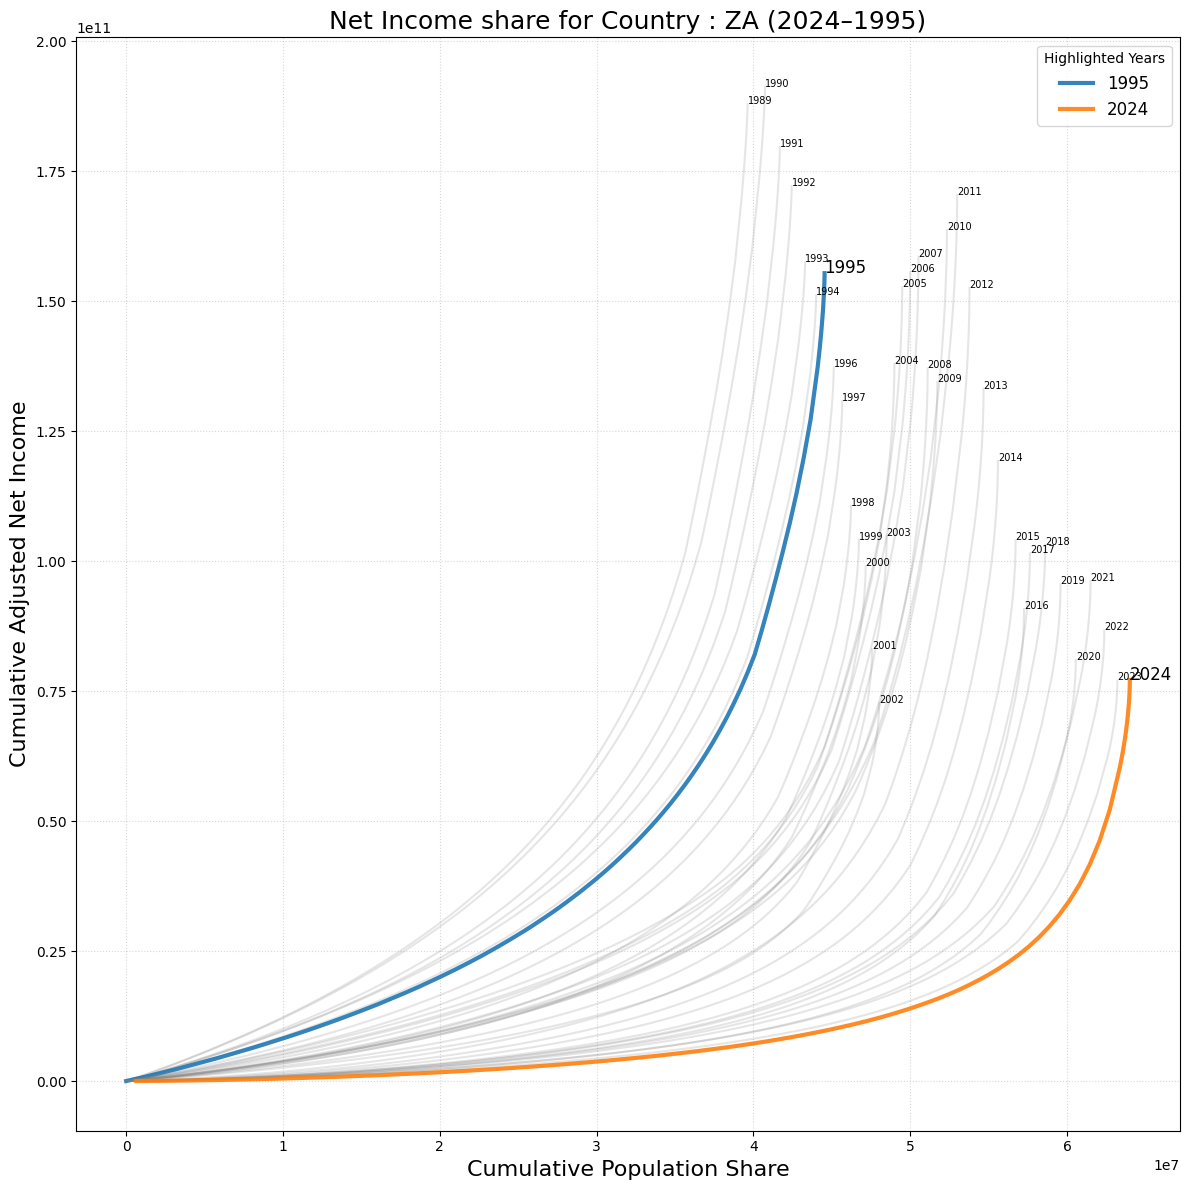

In [82]:
import matplotlib.pyplot as plt
import numpy as np

country_code = ['CN', 'US', 'DE', 'IN', 'ZA']
for code in country_code:

    # Get available years for IN
    years = sorted(df_all[df_all['country_code']==code]['year'].unique())

    # Choose key years to annotate
    first_year = 2024
    last_year = 1995
    middle_year = 1990

    plt.figure(figsize=(12,12))

    for year in years:
        df_cnt = df_all[(df_all['country_code']==code) & (df_all['year']==year)]
        df_cnt = df_cnt.sort_values('population_share')
        
        # Extremes shown boldly
        if year in [first_year, last_year]:
            plt.plot(df_cnt['population_share'], df_cnt['net_income_share'], linewidth=3,
                    label=f'{year}', alpha=0.9)
            # Add year label at end of curve
            plt.text(df_cnt['population_share'].iloc[-1] - 0.005,
                    df_cnt['net_income_share'].iloc[-1],
                    str(year), fontsize=12)
        else:
            # Muted lines for in-between years
            plt.plot(df_cnt['population_share'], df_cnt['net_income_share'], 
                    color="gray", alpha=0.2)
            plt.text(df_cnt['population_share'].iloc[-1] + 0.005,
                    df_cnt['net_income_share'].iloc[-1],
                    str(year), fontsize=7)        

    # Plot perfect equality line
    plt.plot([0,1], [0,1], linestyle="--", color="black", linewidth=1)

    plt.title(f"Net Income share for Country : {code} ({first_year}–{last_year})", fontsize=18)
    plt.xlabel("Cumulative Population Share", fontsize=16)
    plt.ylabel("Cumulative Adjusted Net Income", fontsize=16)
    plt.grid(True, linestyle=":", alpha=0.5)
    plt.legend(title="Highlighted Years", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"Net_Income_share_cured_{code}.png")
    plt.show()

## Interpreting the Net-Income Mass Curves (Absolute Distribution)

This plot shows **cumulative real national income** (y-axis) accumulated as we move through the population from poorer to richer (x-axis).

- **x-axis (Cumulative Population Share):** cumulative number of people/adults (depending on how `population_share` is defined in the code).
- **y-axis (Cumulative Adjusted Net Income):** cumulative **real** national income (inflation-adjusted) captured by that cumulative population.
- Each thin gray curve is a year; two years are highlighted (e.g., first vs last).

### How to read the shape
- A **more bowed / flatter early** curve means the bottom/middle capture less income mass → **higher inequality**.
- A **sharp upturn near the far right** means the top tail captures a large fraction of income mass.
- A **higher overall curve** reflects larger total income mass (growth), not necessarily lower inequality.

### What to look for across countries (qualitative)
- **US / ZA:** steep right-tail takeoff → strong top concentration.
- **DE / NL (if plotted):** smoother curve → stronger middle, less extreme tail.
- **IN / CN:** large population with changing tail shape; compare how strongly the right tail bends over time.


In [79]:
df_merge[df_merge['country_code']=='ZA'].isna().sum()

country_code                          0
year                                  0
bottom_50%                            0
top_0.1%                              0
top_1%                                0
top_10%                               0
country                               0
gdp_percap_const                      0
unemployment_pct                      0
inflation_pct                         0
national_income                       0
trade_openness                        0
education_atainment                  12
ppp_to_usd                            1
fx_to_usd                             0
population                            0
inflation_factor                      0
cpi_index                             0
cpi_base                              0
national_income_per_adult_nominal     0
net_income_real_local                 0
national_income_real_usd              0
net_income_ppp                        1
net_income_usd_fx                     0
dtype: int64

In [80]:
df_merge.isna().sum()

country_code                          0
year                                  0
bottom_50%                            0
top_0.1%                              0
top_1%                                0
top_10%                               0
country                               0
gdp_percap_const                      0
unemployment_pct                      0
inflation_pct                         0
national_income                       0
trade_openness                        0
education_atainment                  80
ppp_to_usd                            5
fx_to_usd                             0
population                            0
inflation_factor                      5
cpi_index                             5
cpi_base                              0
national_income_per_adult_nominal     0
net_income_real_local                 5
national_income_real_usd              5
net_income_ppp                        9
net_income_usd_fx                     5
dtype: int64

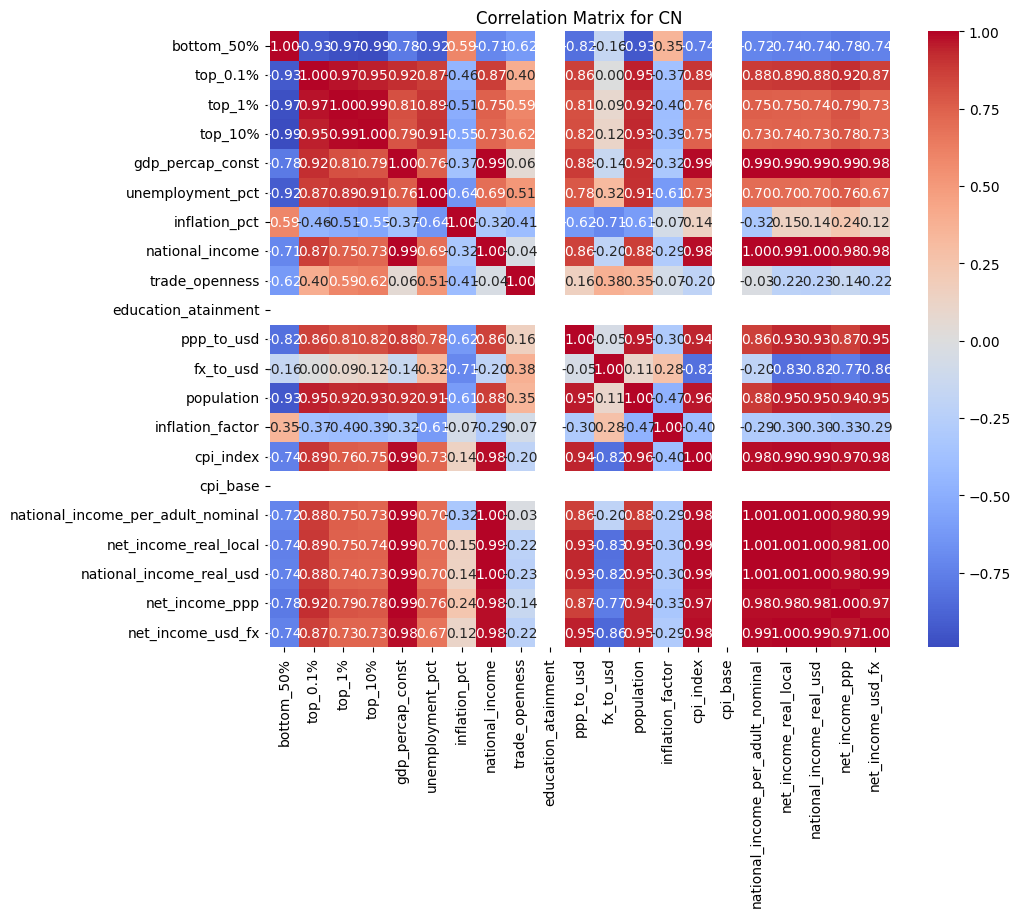

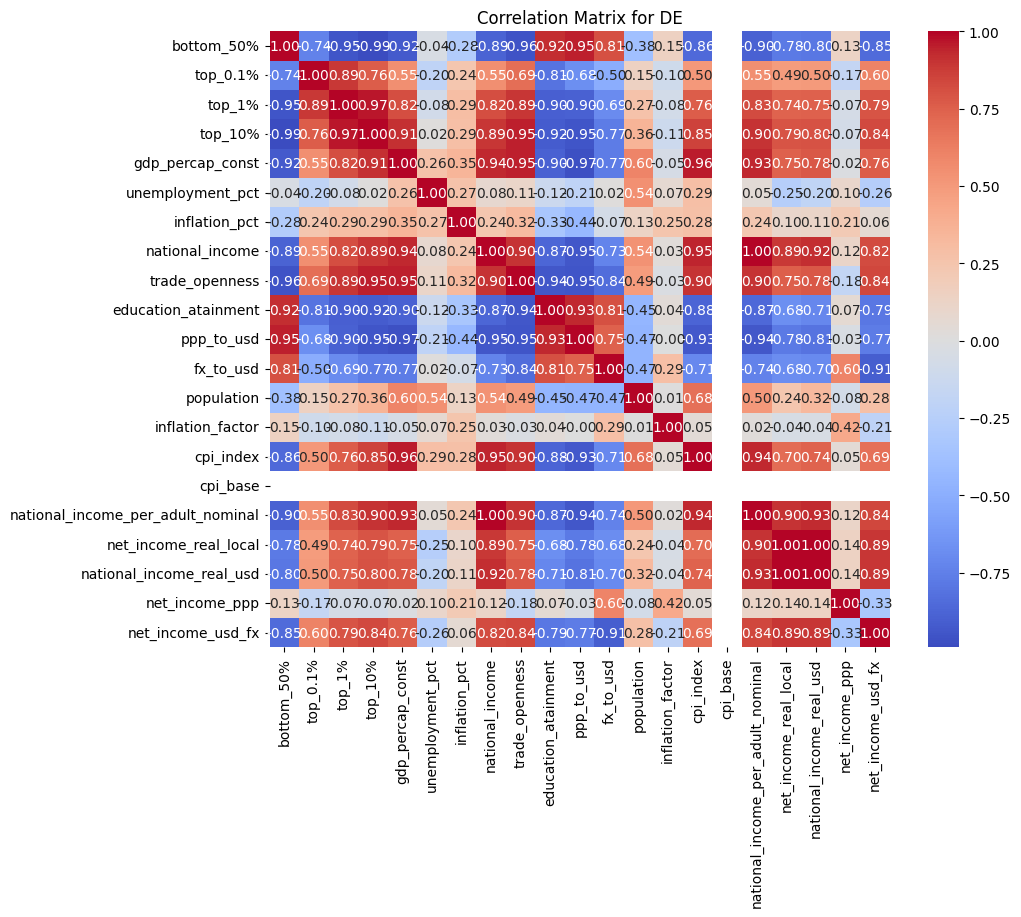

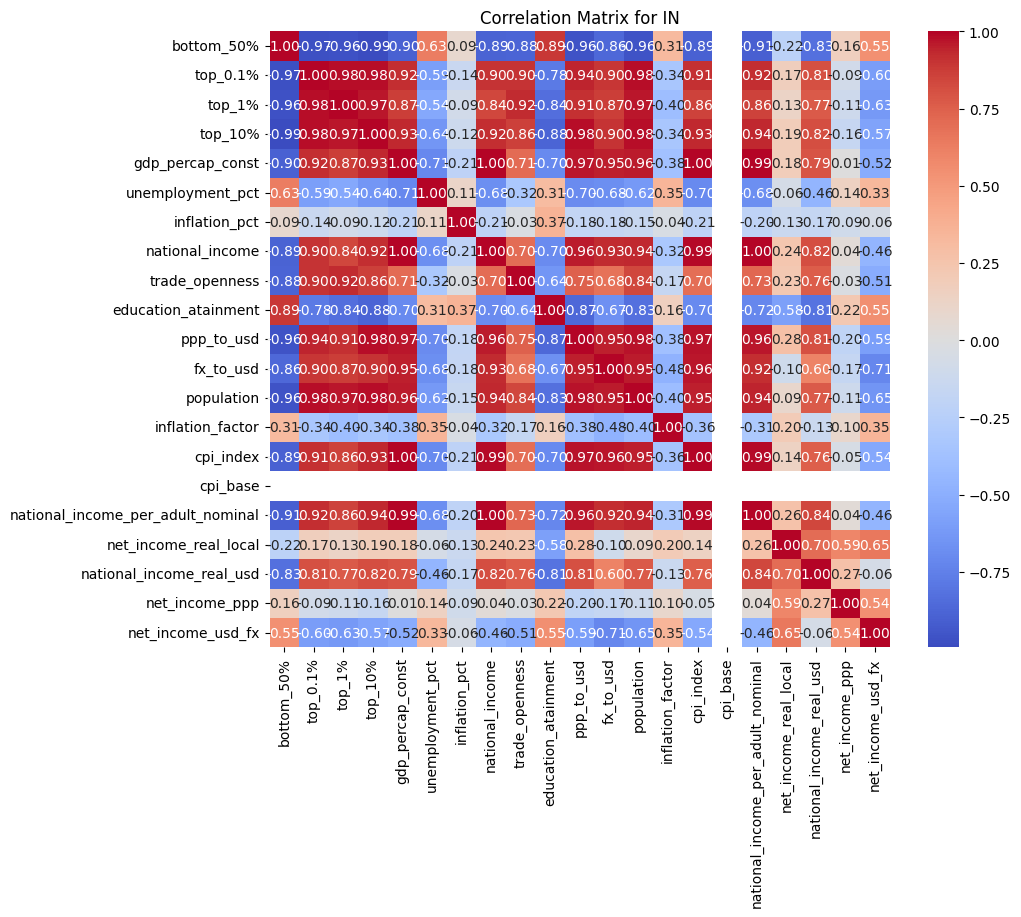

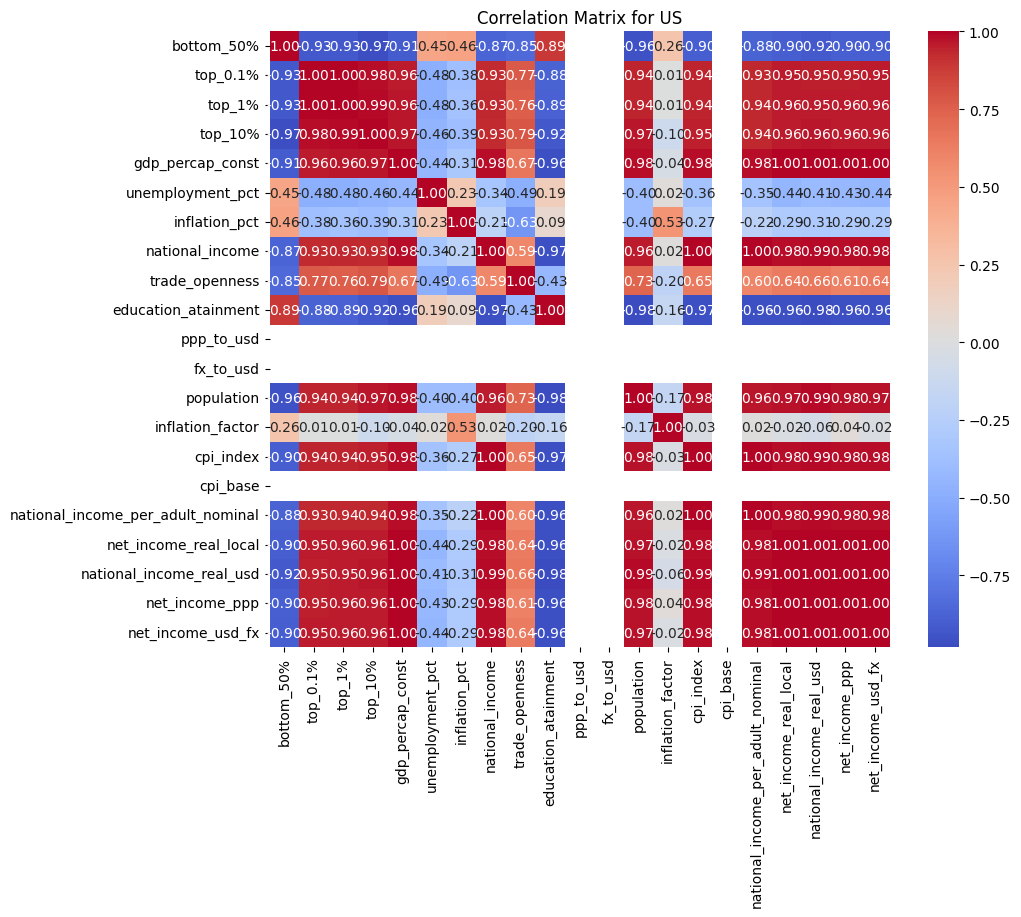

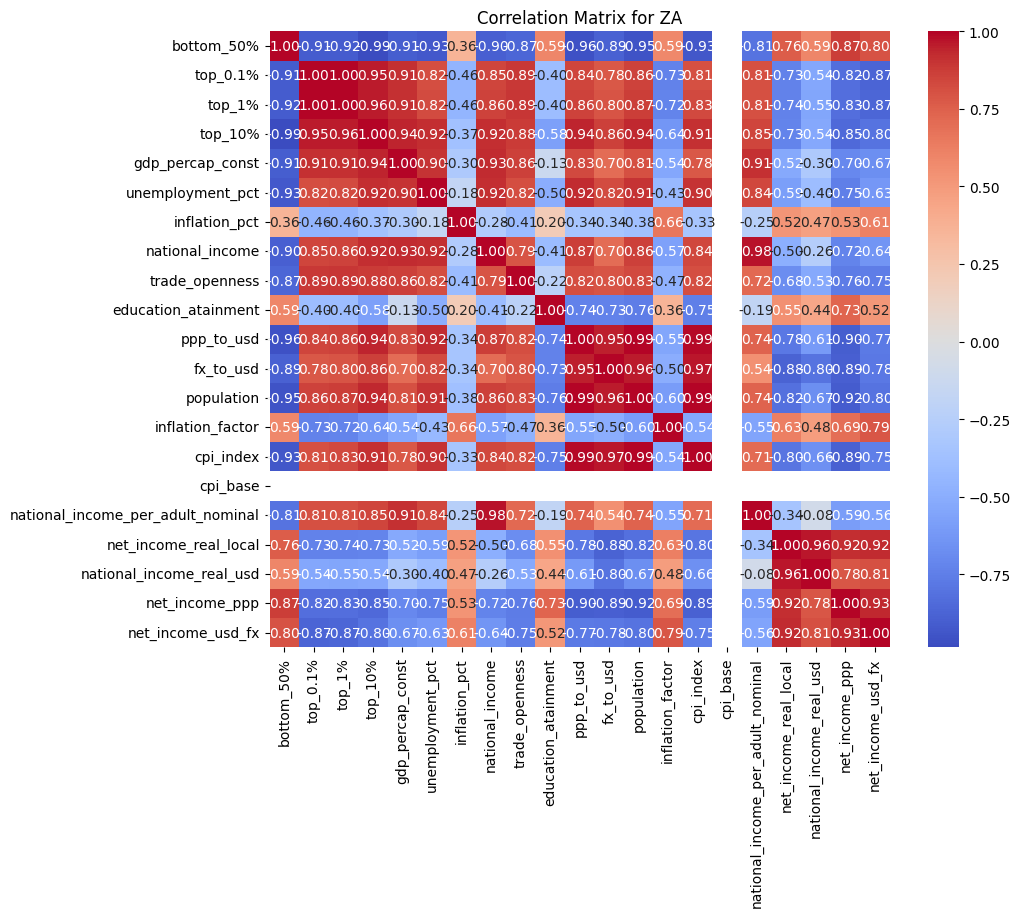

In [81]:
import matplotlib.pyplot as plt

# plot correlation matrix for all the features
import seaborn as sns

for code in df_merge['country_code'].unique():
    country_data = df_merge[df_merge['country_code'] == code]
    df_corr = country_data.drop(columns=['country_code', 'year', 'country']) # Drop non-numeric columns for correlation
    # plot correlation matrix for all the features
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    
    plt.title(f'Correlation Matrix for {code}')
    plt.savefig(f"correlation_{code}.png")
    plt.show()



- Check steps to do for EDA (refer sample)
- Build skeletal for ML (Linear Regression OLS and RANSAC (maybe)) and prediction and its analysis (with visualization)

ValueError: Could not interpret value `trade_pct_gdp` for `x`. An entry with this name does not appear in `data`.

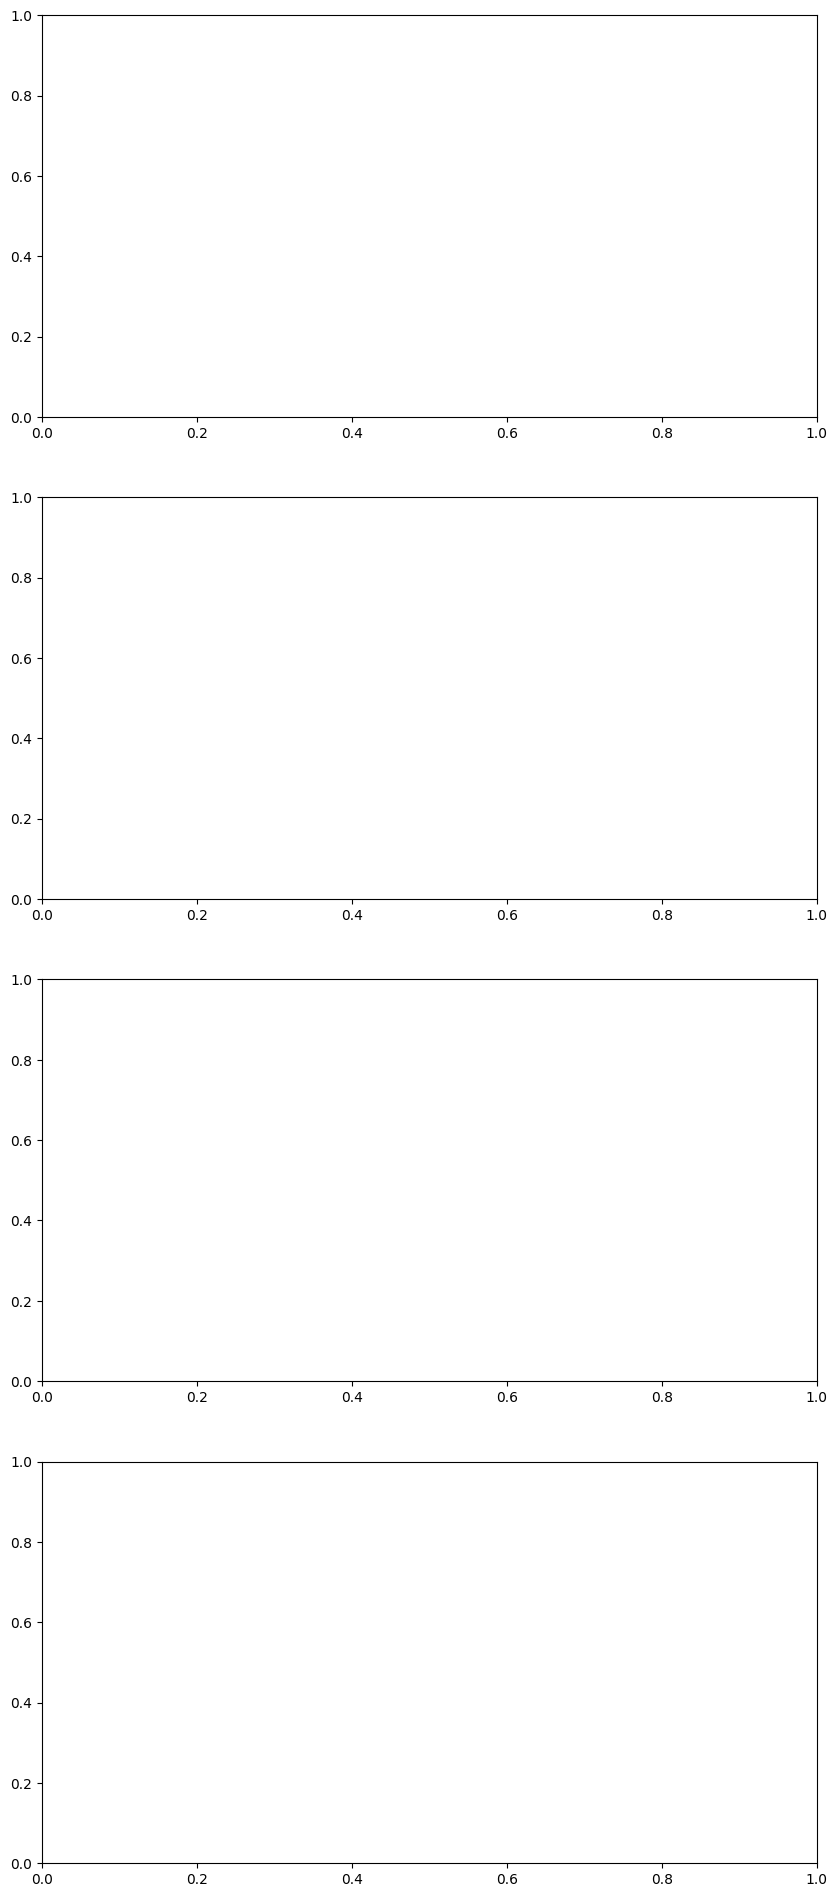

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variables for the x-axis and the countries to plot
x_vars = ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct', 'inflation_pct']
y_var = 'bottom_50%'
# The plan specifies CN, IN, US, NL, ZA.
countries_to_plot = ['CN', 'IN', 'US', 'NL', 'ZA']

# Filter the main dataframe for the selected countries
plot_df = df_merge[df_merge['country_code'].isin(countries_to_plot)]

# Create a figure with a grid of subplots for each x_var
fig, axes = plt.subplots(nrows=len(x_vars), ncols=1, figsize=(10, 6 * len(x_vars)), sharey=True)

# Ensure axes is an array even if there's only one subplot
if len(x_vars) == 1:
    axes = [axes]

for i, x_col in enumerate(x_vars):
    ax = axes[i]

    # Use seaborn scatterplot for better handling of groups
    sns.scatterplot(
        data=plot_df,
        x=x_col,
        y=y_var,
        hue='country_code',
        style='country_code', # Different markers for accessibility
        s=60, # Marker size
        ax=ax
    )

    ax.set_title(f'{y_var.replace("%", " Percent").replace("_", " ").title()} vs. {x_col.replace("_", " ").title()}')
    ax.set_xlabel(x_col.replace('_', ' ').title())
    ax.set_ylabel(y_var.replace('_', ' ').title())
    ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Task
For the selected countries (CN, IN, US, NL, ZA), prepare the dataset by filtering `df_merge` and dropping rows with missing values in the features (`trade_pct_gdp`, `gdp_percap_const`, `unemployment_pct`, `inflation_pct`) or the target (`top_10%`). Then, iterate through each country to train a Linear Regression model (80/20 train-test split) to predict the `top_10%` income share. For each model, calculate the Mean Squared Error (MSE) and R-squared, generate 'Actual vs. Predicted' plots for the test set, and display the model coefficients to identify key economic drivers of inequality.

## Prepare Data for Regression

### Subtask:
Filter the merged dataset for selected countries and remove rows with missing values in relevant columns.


**Reasoning**:
Filter the dataset for specific countries and remove missing values to prepare for regression analysis.



In [84]:
countries_to_analyze = ['CN', 'IN', 'US', 'NL', 'ZA']
feature_cols = ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct', 'inflation_pct']
target_col = 'top_10%'

# Filter for selected countries
df_ml = df_merge[df_merge['country_code'].isin(countries_to_analyze)].copy()

# Drop rows with missing values in features or target
df_ml = df_ml.dropna(subset=feature_cols + [target_col])

print(f"Shape of prepared data: {df_ml.shape}")
df_ml.head()

KeyError: ['trade_pct_gdp']

## Train and Evaluation

Train a Linear Regression model for each country, evaluate performance, and visualize results including coefficients.


## Hypothesis Testing for Linear Regression Models

To conduct a more formal hypothesis test on the significance of each feature's coefficient, we will use the `statsmodels` library. This library provides a comprehensive summary of the regression results, including p-values for each coefficient, which helps determine if there is a statistically significant relationship between the feature and the target variable.

In [85]:
import statsmodels.api as sm

# Iterate through each country to perform OLS regression and hypothesis testing
for country in countries_to_analyze:
    print(f"--- Hypothesis Testing for {country} ---")

    # Filter data for the current country
    country_df = df_ml[df_ml['country_code'] == country]

    # Define features and target
    X = country_df[feature_cols]
    y = country_df[target_col]

    # Add a constant to the independent variable for the intercept term
    X = sm.add_constant(X)

    # Create and fit the OLS model
    model_sm = sm.OLS(y, X).fit()

    # Print the summary of the regression results
    print(model_sm.summary())
    print("\n" + "="*80 + "\n")

--- Hypothesis Testing for CN ---


KeyError: "['trade_pct_gdp'] not in index"

## Concluding Analysis of Hypothesis Test

While the models generally demonstrate remarkable explanatory power (with R-squared values consistently above 0.96 for China, India, US, and South Africa), the individual significance and directional impacts of our chosen variables present a unique picture.

**Consistent Drivers of Top Income Share:**

*   **GDP per capita** emerges as a robust predictor across almost all nations. Its positive coefficients, often with very low p-values, confirm that per capita GDP is strongly correlated with an increasing inequality. This effect is particularly pronounced in developing economies like India and South Africa.

*   **Trade Percentage of GDP** also frequently shows a significant positive correlation, indicating that increased economic openness and trade activity tend to benefit the top income earners, especially evident in China and the US.

**Varying and Complex Relationships:**

*   **Unemployment Percentage** has a dual nature. In countries like China, India, and South Africa, higher unemployment significantly correlates with an *increase* in top 10%'s income share, suggesting that a weaker labor market might exacerbate income concentration.

    Conversely, in US, higher unemployment significantly correlated with a *decrease* in the top 10% share. This difference underscores diverse macroeconomic structures & social safety nets across nations.

*   **Inflation Percentage** has a varied impact. While largely non-significant in China, India, and the US, it shows a significant negative relationship in South Africa. This implies that for some economies, higher inflation may erode the real income share of the wealthiest, or at least not contribute to its growth as directly as other factors.

**Key Takeaways and Confidence:**

We can be highly confident (p < 0.05, often p < 0.001) in the significant influence of GDP per capita, trade and unemployment on the top 10% income share.

The consistent presence of multicollinearity, however, advises caution in isolating the precise magnitude of each individual coefficient's effect, suggesting that these economic factors often move in tandem.

### Removing Insignificant features for each country based on Hypothesis Test:

In [ ]:
# P-value thresholds for exclusion (based on previous OLS summary)
# Features with p-value > 0.1 will be excluded for each country
exclusion_map = {
    'CN': ['inflation_pct'], # inflation_pct p-value: 0.220
    'IN': ['inflation_pct'], # inflation_pct p-value: 0.850
    'US': ['inflation_pct'], # inflation_pct p-value: 0.272
    'NL': ['inflation_pct'], # inflation_pct p-value: 0.770
    'ZA': ['trade_pct_gdp'] # trade_pct_gdp p-value: 0.136
}

### Training the model & evaluate its MSE

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import statsmodels.api as sm

models = {}
plot_data = [] # List to store data for plotting

# Iterate through each country
for country in countries_to_analyze:
    print(f"--- Analysis for {country} ---")

    # Filter data for the current country
    country_df = df_ml[df_ml['country_code'] == country]

    # Check if there is enough data points
    if len(country_df) < 5:
        print(f"Not enough data to train model for {country} (n={len(country_df)})")
        continue

    # Determine which features to use based on p-value exclusion
    features_to_exclude = exclusion_map.get(country, [])
    current_feature_cols = [f for f in feature_cols if f not in features_to_exclude]

    if not current_feature_cols:
        print(f"No features left for {country} after exclusion. Skipping model training.")
        continue

    # Define features and target
    X = country_df[current_feature_cols]
    y = country_df[target_col]

    print(f"Using features for {country}: {current_feature_cols}")

    # Initialize and fit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    models[country] = model

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.6f}")
    print(f"R-squared: {r2:.4f}")

    # Coefficients
    coef_df = pd.DataFrame({
        'Feature': current_feature_cols,
        'Coefficient': model.coef_
    })
    print("\nModel Coefficients:")
    display(coef_df)

    # Store data for plotting later
    plot_data.append({
        'country': country,
        'y_test': y_test,
        'y_pred': y_pred
    })
    print("\n" + "="*40 + "\n")

--- Analysis for CN ---
Mean Squared Error: 0.000043
R-squared: 0.2933

Model Coefficients:


Feature  Coefficient
0     trade_pct_gdp     0.013721
1  gdp_percap_const     0.018260
2  unemployment_pct     0.020003
3     inflation_pct     0.001630



--- Analysis for IN ---
Mean Squared Error: 0.000130
R-squared: 0.9571

Model Coefficients:


Feature  Coefficient
0     trade_pct_gdp     0.026594
1  gdp_percap_const     0.074880
2  unemployment_pct     0.021543
3     inflation_pct    -0.000474



--- Analysis for US ---
Mean Squared Error: 0.000016
R-squared: 0.9265

Model Coefficients:


Feature  Coefficient
0     trade_pct_gdp     0.006616
1  gdp_percap_const     0.019284
2  unemployment_pct    -0.001467
3     inflation_pct    -0.001121



--- Analysis for NL ---
Mean Squared Error: 0.000022
R-squared: -0.8865

Model Coefficients:


Feature  Coefficient
0     trade_pct_gdp    -0.005694
1  gdp_percap_const     0.016446
2  unemployment_pct     0.002691
3     inflation_pct     0.000136



--- Analysis for ZA ---
Mean Squared Error: 0.000174
R-squared: 0.8658

Model Coefficients:


Feature  Coefficient
0     trade_pct_gdp     0.005545
1  gdp_percap_const     0.050937
2  unemployment_pct     0.017614
3     inflation_pct    -0.009459

### Evaluation of Models: Actual vs. Predicted Plots

These plots visualize the performance of our Linear Regression models for each country. For each graph:

*   **X-axis (Actual Top 10% Share)**: Represents the true 'top 10%' income share values from the test dataset.
*   **Y-axis (Predicted Top 10% Share)**: Shows the 'top 10%' income share values predicted by our trained model.
*   **Blue Dots**: Each dot corresponds to an actual data point from the test set, with its predicted value on the Y-axis.
*   **Red Dashed Line**: This diagonal line represents a 'perfect prediction' scenario, where `Actual = Predicted`. The closer the blue dots are to this red line, the better the model's accuracy.

These plots help us visually assess how well each country's model generalizes to unseen data, indicating areas where predictions are accurate and where there might be discrepancies.

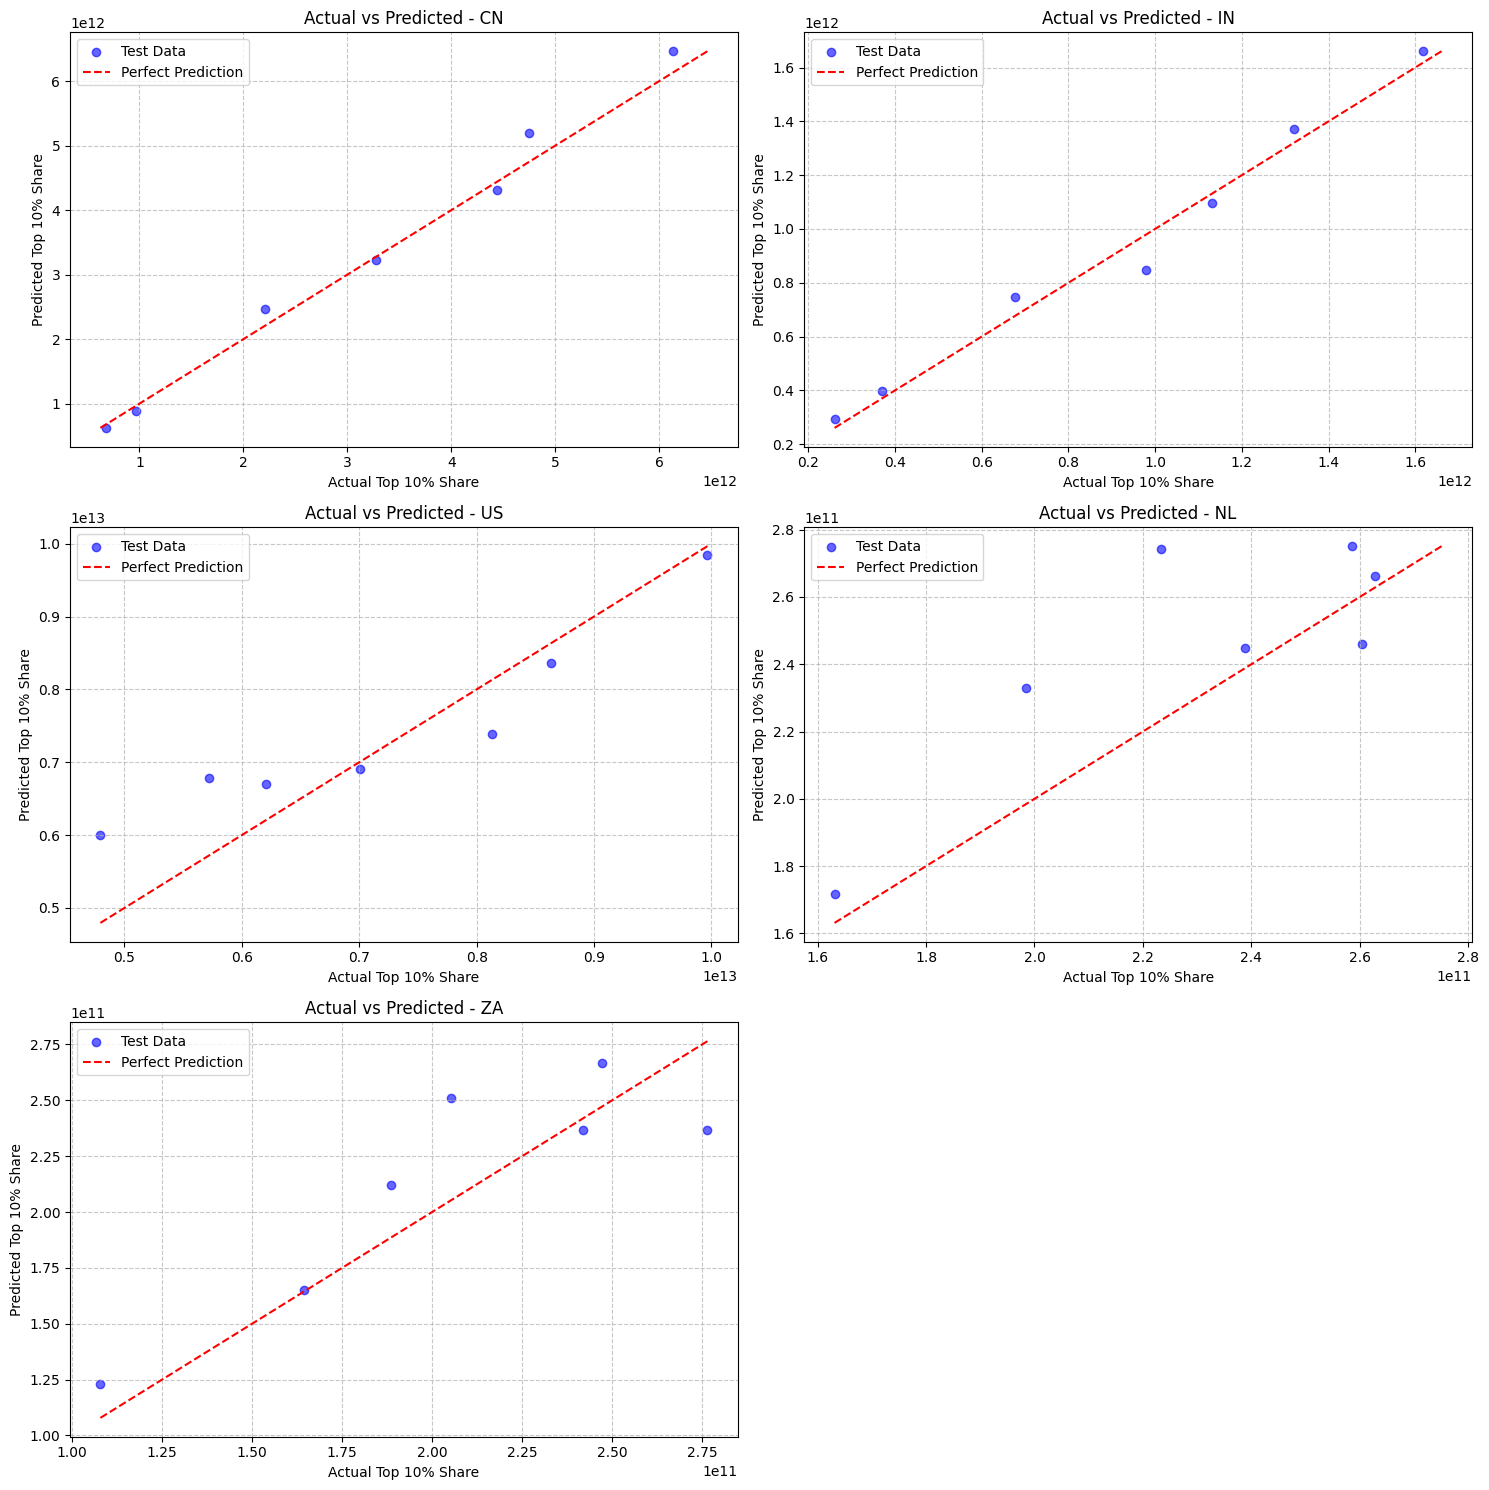

In [ ]:
# Plot of 'Actual vs Predicted' graph of the countries
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, data in enumerate(plot_data):
    ax = axes[i]
    country = data['country']
    y_test = data['y_test']
    y_pred = data['y_pred']

    ax.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Test Data')

    # Plot diagonal line for reference
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

    ax.set_xlabel('Actual Top 10% Share')
    ax.set_ylabel('Predicted Top 10% Share')
    ax.set_title(f'Actual vs Predicted - {country}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Conclusion**: Leveraging the Model for Policy-Making to Combat Inequality

Our analysis and the developed Linear Regression models provide a powerful tool for understanding and simulating the proportion of wealth held by the top 10% richest individuals, which serves as a key indicator of income inequality within a country. By identifying the significant economic drivers—such as GDP per capita, trade percentage of GDP, and unemployment rates—these models offer a data-driven lens into the mechanisms that influence income concentration.


**Governments can utilize these models for:**

1.  **Forecasting Inequality Trends**: By inputting projected values for economic indicators, policymakers can simulate potential future scenarios for Wealth Inequality which allows governments to anticipate rising inequality and proactive policy interventions.
2.  **Impact Assessment of Economic Policies**: Before implementing new economic policies, their potential impact on income inequality can be assessed.
3.  **Targeted Interventions**: Helps understand which economic factors drive inequality in a country (determined by model's coeff & p-values) & enables govts. to design more effective interventions. For example, if unemployment significantly exacerbates the top 10% share (as in China, India, and SA), policies focused on job creation and social safety nets become critical.
4.  **Evidence-Based Decision Making**: By demonstrating the quantitative relationship between macroeconomic factors and income concentration, governments can advocate for policies with a clearer understanding of their expected outcomes.

---
# Rough Work

---